___
# `Project-04`: HR Analytics
___

In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing in the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Dataset Background
* Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

In [5]:
df.columns.drop('Attrition',1)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Features and Targets:
   <b>INPUT FEATURES</b>:
                   
                   'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
                   'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
                   'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
                   'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                   'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
                   'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                   'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager'
                   
   <b>TARGET FEATURE</b>: 
                   
                   'Attrition'

### Goal:

* We have to find the if the employee is likely to leave the company based on the historical data of the employees of a company
* <b>Attrition</b> in human resources refers to the gradual loss of employees over time.

In [6]:
# head of the data:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
# random samples from the data
df.sample(5)

Age Attrition BusinessTravel  DailyRate              Department  \
1203   53        No  Travel_Rarely       1395  Research & Development   
417    40        No  Travel_Rarely       1398                   Sales   
882    36        No  Travel_Rarely        363  Research & Development   
1141   30        No  Travel_Rarely        241  Research & Development   
602    30        No  Travel_Rarely        946  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1203                24          4           Medical              1   
417                  2          4     Life Sciences              1   
882                  1          3  Technical Degree              1   
1141                 7          3           Medical              1   
602                  2          3           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1203            1689                        2    Male          48   
417              558                        3  Female          79   
882             1237                        3  Female          77   
1141            1609                        2    Male          48   
602              833                        3  Female          52   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1203               4         3  Healthcare Representative                4   
417                3         5                    Manager                3   
882                1         3     Manufacturing Director                1   
1141               2         1         Research Scientist                2   
602                2         2     Manufacturing Director                4   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1203       Married           7005         3458                   3      Y   
417        Married          18041        13022                   0      Y   
882       Divorced          10252         4235                   2      Y   
1141       Married           2141         5348                   1      Y   
602         Single           6877        20234                   5      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1203       No                 15                  3                         3   
417        No                 14                  3                         4   
882       Yes                 21                  4                         3   
1141       No                 12                  3                         2   
602       Yes                 24                  4                         2   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1203             80                 0                 11   
417              80                 0                 21   
882              80                 1                 17   
1141             80                 1                  6   
602              80                 0                 12   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1203                      2                3               4   
417                       2                3              20   
882                       2                3               7   
1141                      3                2               6   
602                       4                2               0   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1203                   3                        1                     2  
417                   15                        1                    12  
882                    7                        7                     7  
1141                   4                        1                     1  
602                    0                        0                     0

In [8]:
# shapeof the data
df.shape

(1470, 35)

* There are 1470 samples in the dataset.
* There are 34 features (excl. the target) in the dataset.

In [9]:
# info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* We have some categorical but mostly mostly numerical datatype of features.

In [10]:
# description of the categorcal features
df.describe(include=np.object)

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

Inference form the above description:
    * 3 Unique values in business travel.
    * 3 Unique values in types of department in the company.
    * 6 Different types of Education Field working in the company.
    * A total of 9 Positions are there in the company.
    
    * All of the emplopees working in the company are over 18 (Unique=1) 
    * Overtime is a binary feature
    
    * Target Variable `Attrition` is a binary target.This means we have to perform classification on this dataset.

In [11]:
# dataset numerical feautres description:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

Points to Look For:
           * Education is an numerical value.    

### Checking for missing value in the datset

In [12]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

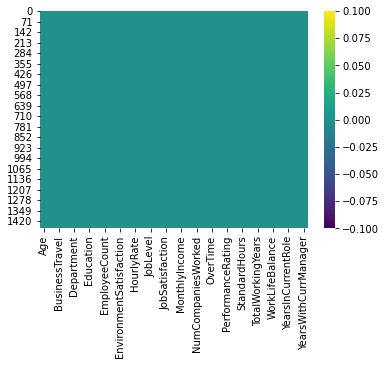

In [13]:
sns.heatmap(df.isna(),cmap='viridis')

* A Clean Slate!
* This is a healthy dataset.
* There are no missing values in the dataset.

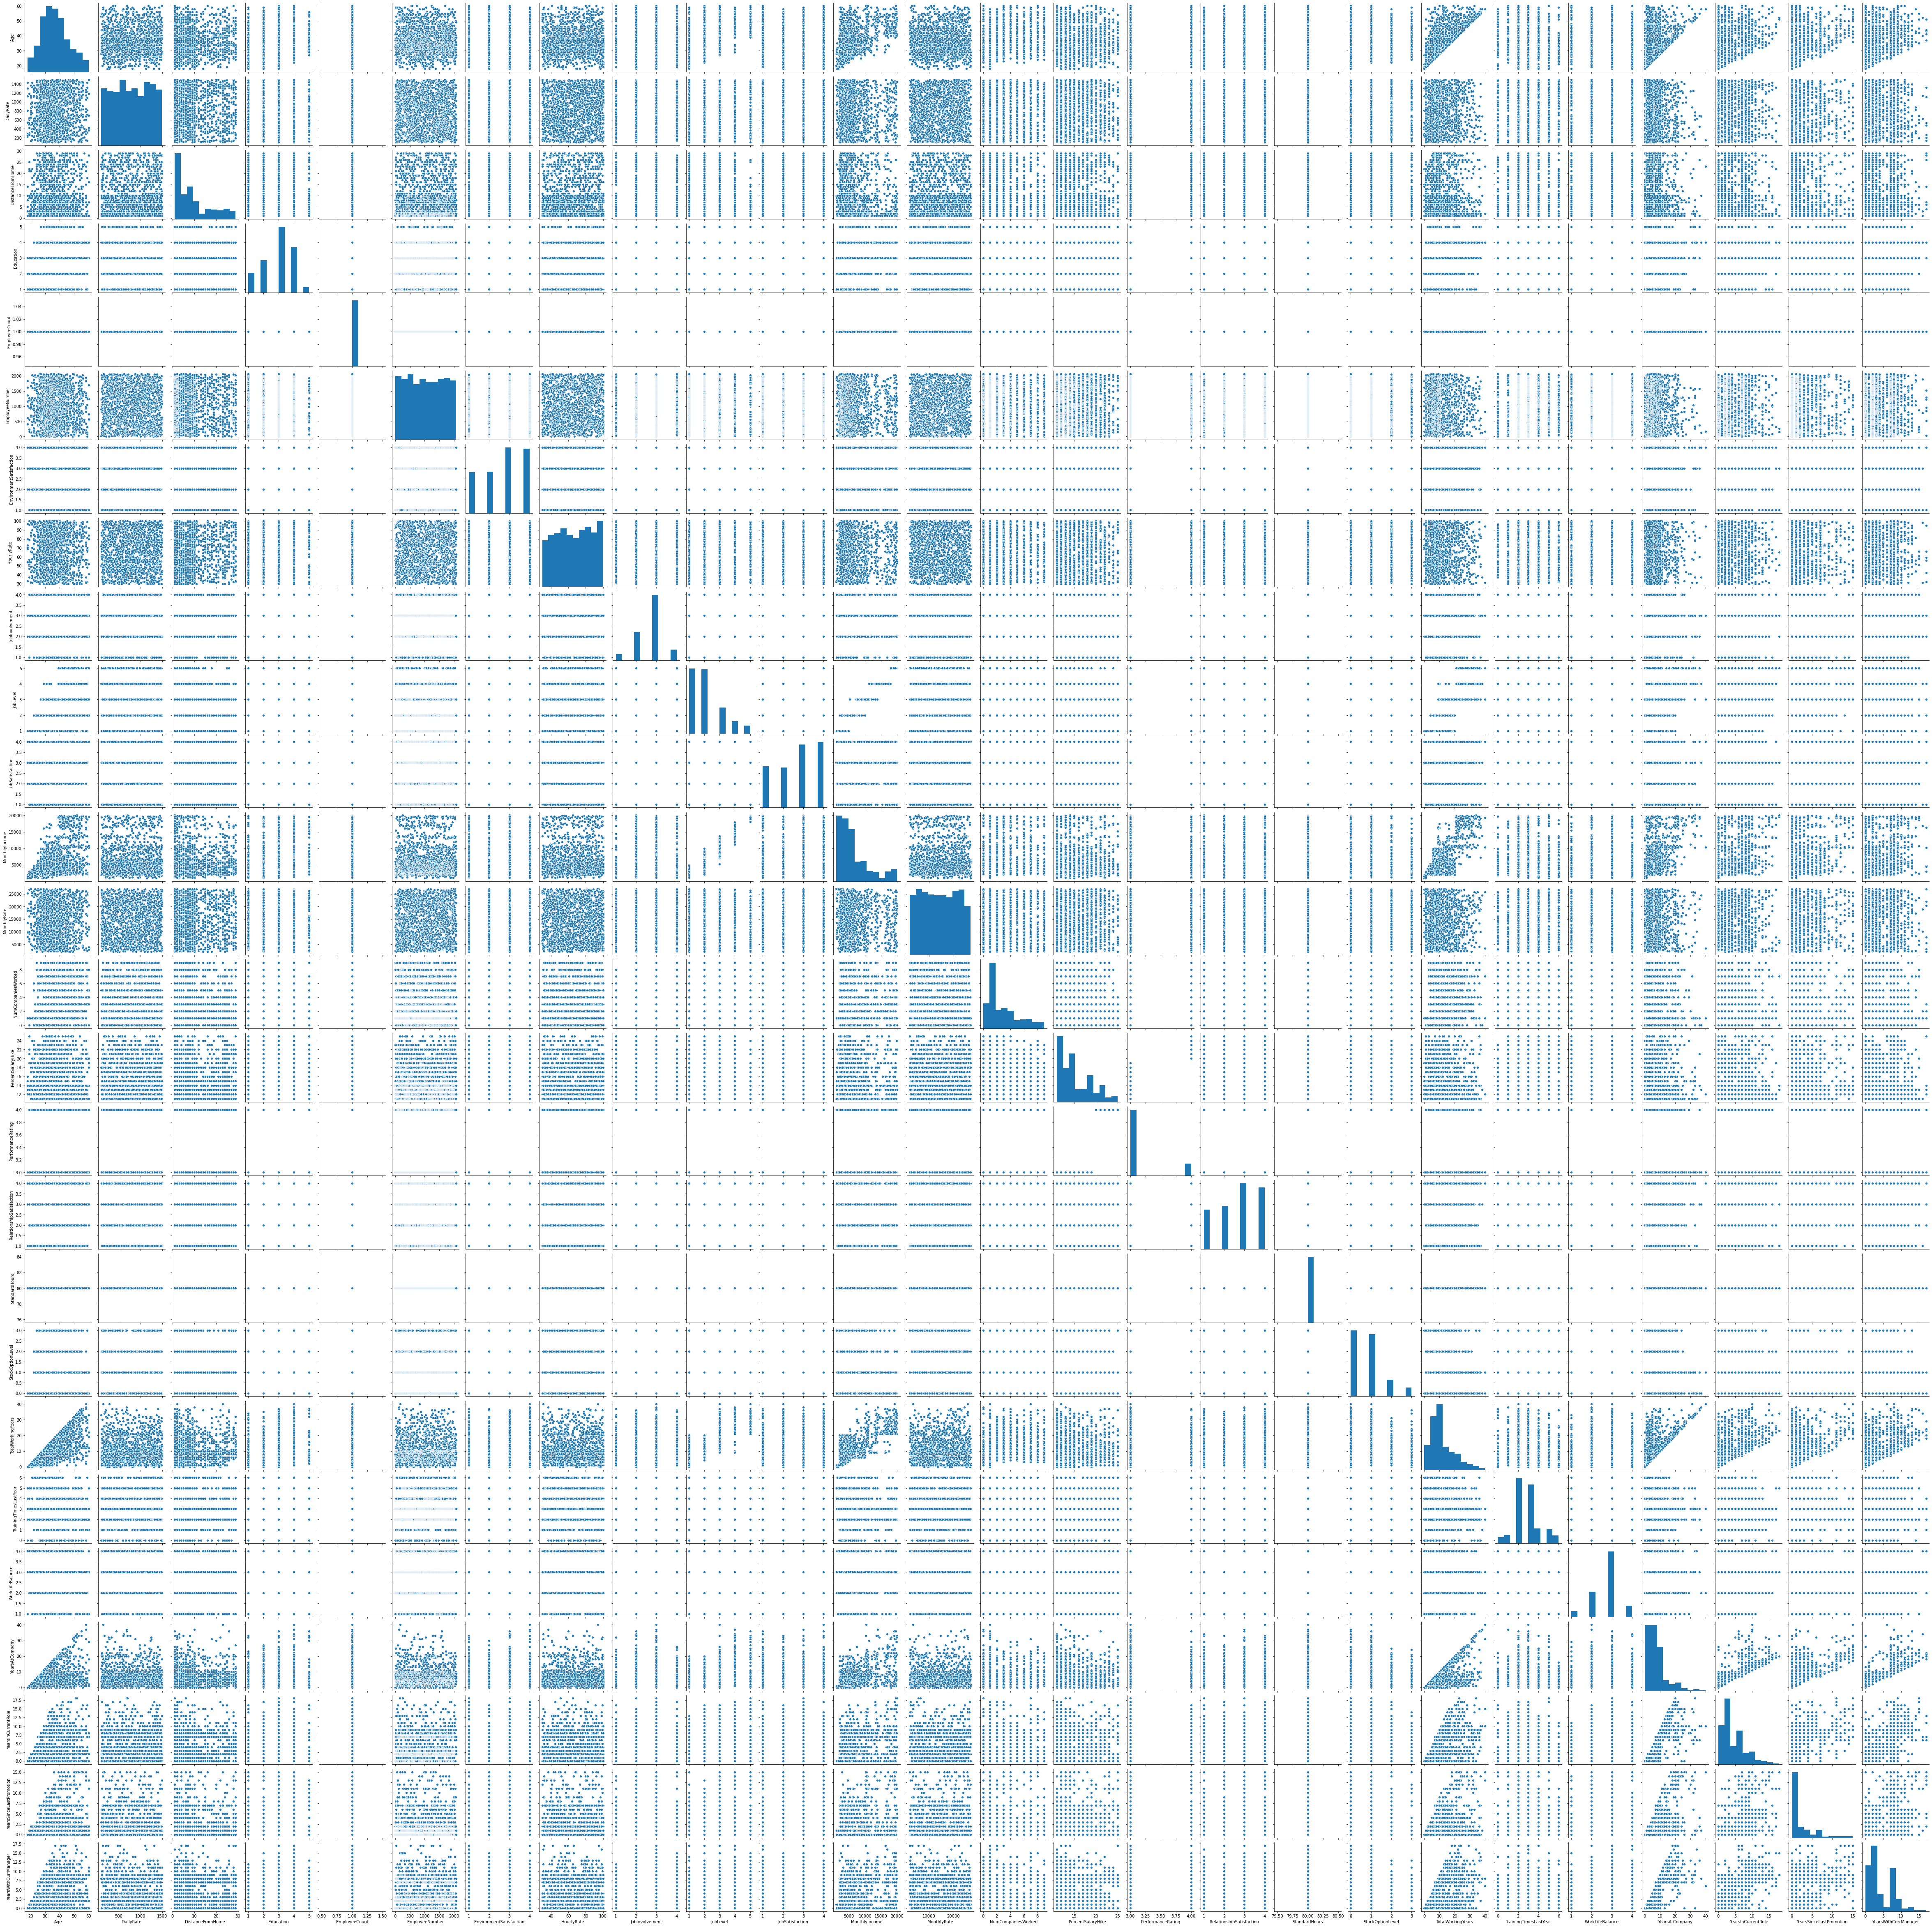

In [21]:
# pairplot of the dataset
sns.pairplot(df)

In [14]:
# That's one hulk of a pair plot!

In [15]:
# let's seperate the numerical coulums and the categorical columns:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [16]:
# numerical features:
num_features = _find_numerical_variables(df)
# categorical features:
cat_features = _find_categorical_variables(df)

In [17]:
np.array(num_features)

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype='<U24')

In [18]:
np.array(cat_features)

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='<U14')

In [19]:
# Let's check for correlations beween the features of the dataset.
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

In [21]:
# Helper Functions

def fig_this_large(x,y):
    return plt.figure(figsize=(x,y))

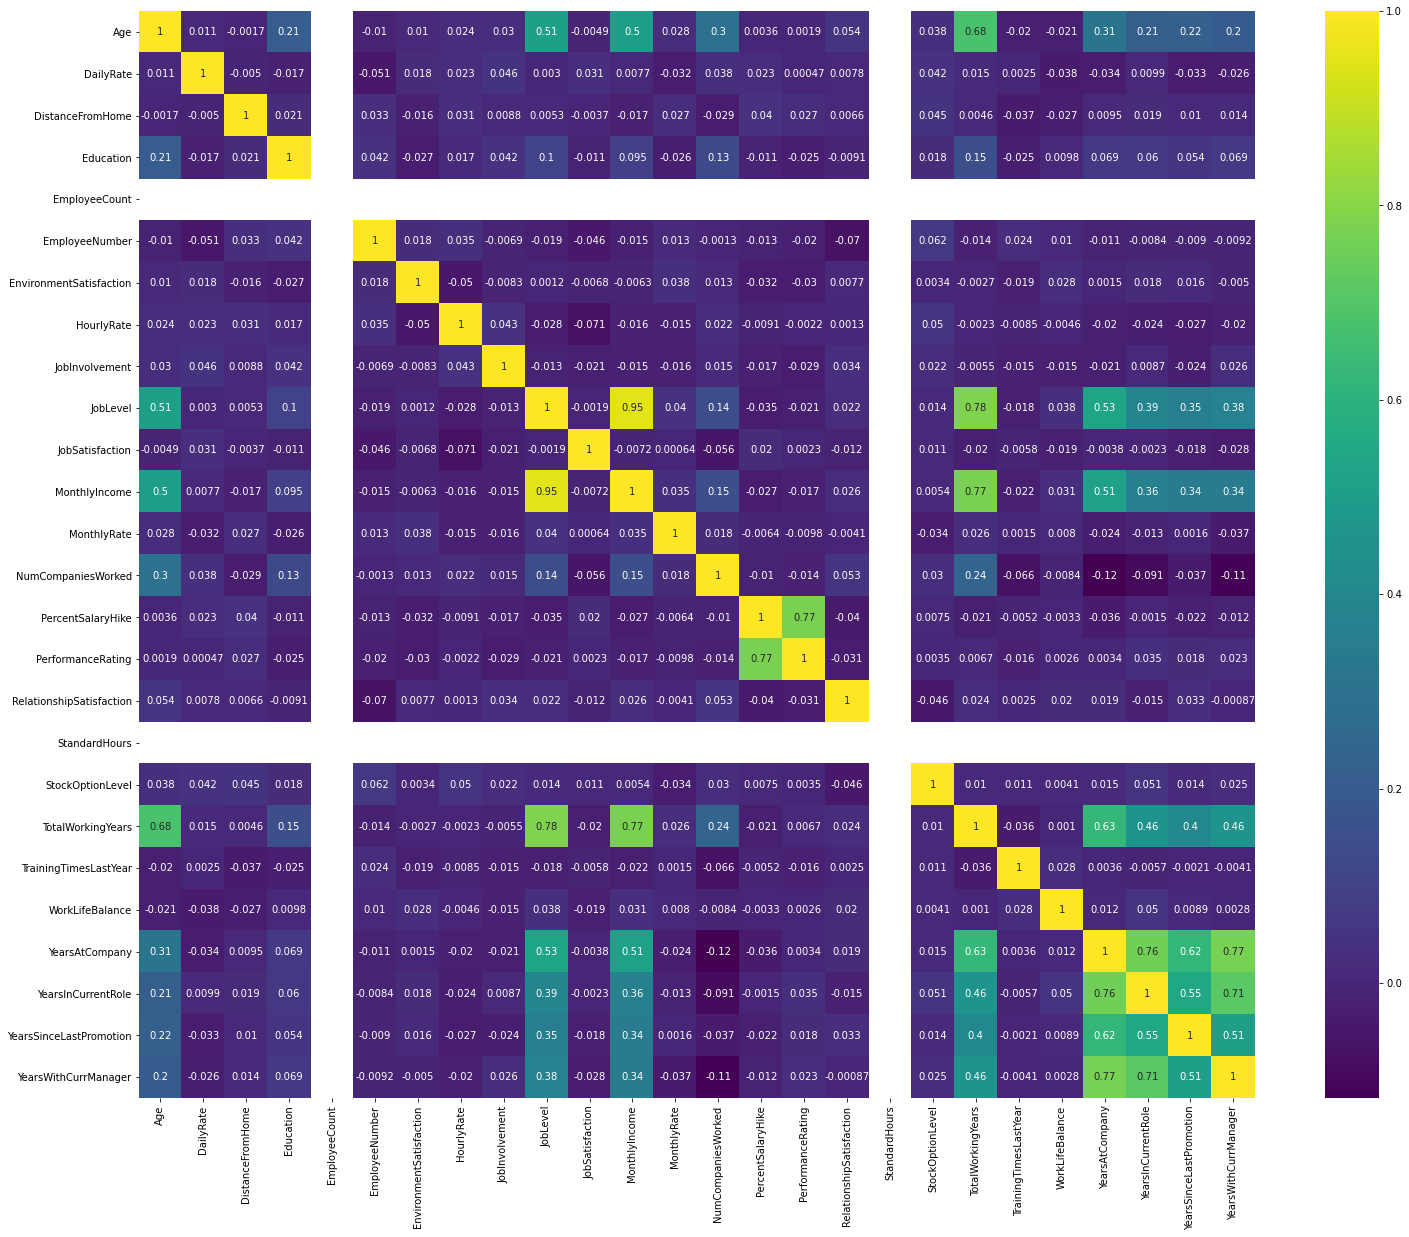

In [22]:
# potting the heatmap is the best way to visualize correlations
fig_this_large(25,20)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

* The features monthly incore and job level are highly correlated.
* All the features describing the number of years of the empployee with different instances of the company are moderatively postively correlated with each other. 

### Univariate Analysis

In [23]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [24]:
# Let's start with Age

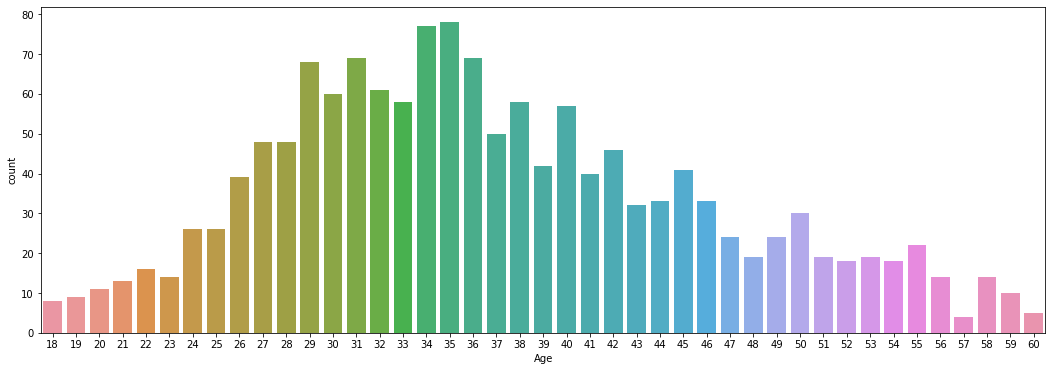

In [25]:
fig_this_large(18,6)
sns.countplot(df.Age)

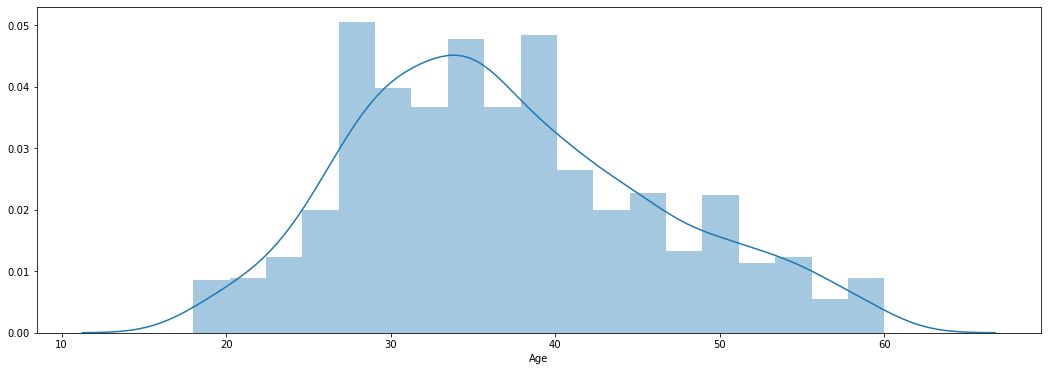

In [26]:
fig_this_large(18,6)
sns.distplot(df.Age)

* Most of the employess in the company are from the age group of 26 to 38
* The minumum age required to work in the company is 18yrs.
* No workers are from the over 60 yrs of age i.e. from the senior citizen category.

In [27]:
# Business Travel

In [28]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

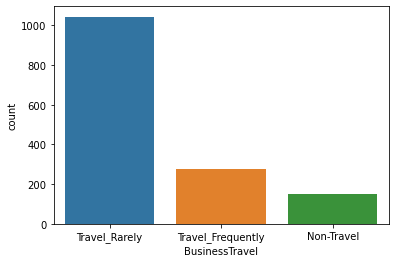

In [29]:
sns.countplot(df.BusinessTravel)

In [30]:
len(df[df.BusinessTravel == 'Travel_Frequently'])/len(df) * 100

18.843537414965986

* Most of the perople in the company travel rarely but there are very few non travellers.
* The frequent travellers only make up about 18.85 percent of the total employees. 

In [31]:
# Daily rate

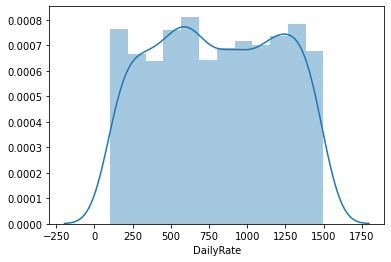

In [32]:
sns.distplot(df.DailyRate)

* Daily rate has a pretty uniform distribution.
* A day rate is the cost of an individual's work for a single day. 

In [33]:
df.DailyRate.min()

102

In [34]:
df.DailyRate.max()

1499

The range of daily rate is between 120 to 1499 

In [35]:
# Department
df.Department.value_counts().values

array([961, 446,  63], dtype=int64)

In [36]:
# As we know there are in total 3 departments in the company.

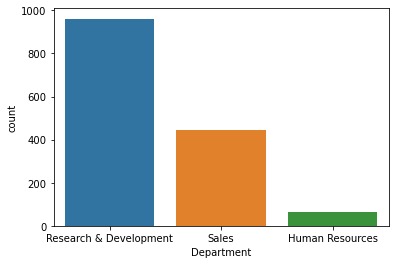

In [37]:
sns.countplot(df.Department,order=df.Department.value_counts().index)

In [38]:
len(df[df.Department == 'Research & Development'])/len(df)

0.6537414965986394

* The Company has more than 65 percent of employees in the R&D department.
* Every company invests the maximum in Reasearch and Development Departments.
* Sales and HR makes the other 35 percent of the comapny employees.

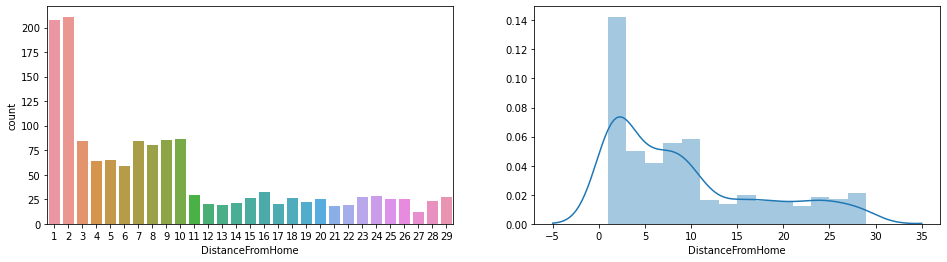

In [39]:
# distance from home
fig = fig_this_large(16,4)

fig.add_subplot(121)
sns.countplot(df.DistanceFromHome)

fig.add_subplot(122)
sns.distplot(df.DistanceFromHome)

In [40]:
# The distribution is positively skewed.
# A high number of employees leave in the vicinity of the company ot reduce travelling time and expenses.

In [41]:
## Education field
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

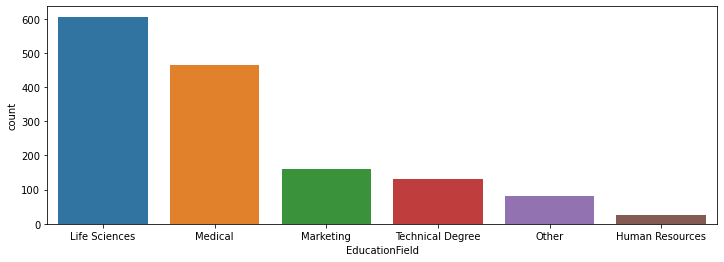

In [42]:
fig_this_large(12,4)
sns.countplot(df.EducationField,order=df.EducationField.value_counts().index)

In [43]:
df[df.EducationField == 'Technical Degree']['Department'].value_counts()

Research & Development    94
Sales                     34
Human Resources            4
Name: Department, dtype: int64

* most of the employees come from life science education background.
* There are very few employees with technical degree
* Almost all of them work in the R&D depeartment (71%)

In [44]:
## Education 

In [45]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [46]:
df.sort_values('Education',ascending=False).head(20)

Age Attrition     BusinessTravel  DailyRate              Department  \
1111   53       Yes      Travel_Rarely        607  Research & Development   
52     44        No      Travel_Rarely       1488                   Sales   
1028   41        No      Travel_Rarely       1283  Research & Development   
1026   32        No      Travel_Rarely        601                   Sales   
455    33        No      Travel_Rarely        922  Research & Development   
1014   31        No      Travel_Rarely        182  Research & Development   
466    41        No      Travel_Rarely       1276                   Sales   
169    32        No      Travel_Rarely        120  Research & Development   
1312   31       Yes      Travel_Rarely        359         Human Resources   
491    43        No  Travel_Frequently       1001  Research & Development   
151    35        No      Travel_Rarely        662                   Sales   
503    34        No      Travel_Rarely       1397  Research & Development   
1177   50        No      Travel_Rarely        813  Research & Development   
545    30        No      Travel_Rarely        501                   Sales   
559    38        No      Travel_Rarely        268  Research & Development   
560    34        No      Travel_Rarely        167  Research & Development   
1371   56        No      Travel_Rarely       1443                   Sales   
908    33        No      Travel_Rarely        536                   Sales   
887    42        No  Travel_Frequently        458  Research & Development   
878    42        No         Non-Travel        179         Human Resources   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1111                 2          5  Technical Degree              1   
52                   1          5         Marketing              1   
1028                 5          5           Medical              1   
1026                 7          5         Marketing              1   
455                  1          5           Medical              1   
1014                 8          5     Life Sciences              1   
466                  2          5     Life Sciences              1   
169                  6          5     Life Sciences              1   
1312                18          5   Human Resources              1   
491                  9          5           Medical              1   
151                  1          5         Marketing              1   
503                  1          5     Life Sciences              1   
1177                17          5     Life Sciences              1   
545                 27          5         Marketing              1   
559                  2          5           Medical              1   
560                  8          5     Life Sciences              1   
1371                11          5         Marketing              1   
908                 10          5         Marketing              1   
887                 26          5           Medical              1   
878                  2          5           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1111            1572                        3  Female          78   
52                68                        2  Female          75   
1028            1448                        2    Male          90   
1026            1446                        4    Male          97   
455              612                        1  Female          95   
1014            1430                        1  Female          93   
466              625                        2  Female          91   
169              231                        3    Male          43   
1312            1842                        4    Male          89   
491              663                        4    Male          72   
151              204                        3    Male          94   
503              683                        2    Male          42   
1177            1656

In [47]:
df.sort_values('Education',ascending=False).tail(20)

Age Attrition     BusinessTravel  DailyRate              Department  \
435    33       Yes      Travel_Rarely       1277  Research & Development   
1222   24       Yes      Travel_Rarely        240         Human Resources   
563    25        No      Travel_Rarely        883                   Sales   
1221   45        No         Non-Travel       1238  Research & Development   
149    19        No      Travel_Rarely       1181  Research & Development   
565    23        No      Travel_Rarely        310  Research & Development   
1318   29        No  Travel_Frequently        574  Research & Development   
924    35        No      Travel_Rarely        735  Research & Development   
434    31        No      Travel_Rarely       1274  Research & Development   
134    26        No      Travel_Rarely       1355         Human Resources   
1049   30        No      Travel_Rarely       1358                   Sales   
1324   29        No      Travel_Rarely        726  Research & Development   
914    55        No         Non-Travel        177  Research & Development   
1328   27        No      Travel_Rarely        728                   Sales   
1329   29        No      Travel_Rarely        352         Human Resources   
576    27        No  Travel_Frequently        829                   Sales   
911    25       Yes  Travel_Frequently        599                   Sales   
1059   35        No      Travel_Rarely        660                   Sales   
577    37        No      Travel_Rarely        571  Research & Development   
160    22        No      Travel_Rarely       1256  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
435                 15          1          Medical              1   
1222                22          1  Human Resources              1   
563                 26          1          Medical              1   
1221                 1          1    Life Sciences              1   
149                  3          1          Medical              1   
565                 10          1          Medical              1   
1318                20          1          Medical              1   
924                  6          1    Life Sciences              1   
434                  9          1    Life Sciences              1   
134                 25          1    Life Sciences              1   
1049                16          1    Life Sciences              1   
1324                29          1    Life Sciences              1   
914                  8          1          Medical              1   
1328                23          1          Medical              1   
1329                 6          1          Medical              1   
576                  8          1        Marketing              1   
911                 24          1    Life Sciences              1   
1059                 7          1    Life Sciences              1   
577                 10          1    Life Sciences              1   
160                 19          1          Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
435              582                        2    Male          56   
1222            1714                        4    Male          58   
563              781                        3  Female          32   
1221            1712                        3    Male          74   
149              201                        2  Female          79   
565              784                        1    Male          79   
1318            1852                        4    Male          40   
924             1291                        3    Male          66   
434              581                        3    Male          33   
134              177                        3  Female          61   
1049            1479                        4    Male          96   
1324            1859                        4    Male          93   
914             1278                     

Some Implications and Some Inferences:

* The education is an integer type  ordinal categorical feature.
* The education integer feature is from 1 to 5 ,5 being the highest.
* The education integer is irrespective of the field you are working in.
* The education ia signification relation of education integer to the age of the employee. The more the age, the highter the education integer.
* We could imply that the employees with highest education integer (5) are professioinals with PHDs or higher degrees.

In [48]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [49]:
# Relation Satisfaction Level
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

* An ordinal integer categorical feature type.

In [50]:
# Stockoptionlevel
df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

* is an binary value 

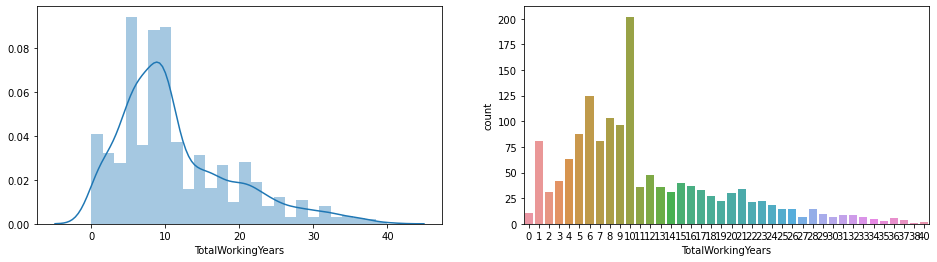

In [51]:
# total working years
fig = fig_this_large(16,4)

fig.add_subplot(121)
sns.distplot(df.TotalWorkingYears)

fig.add_subplot(122)
sns.countplot(df.TotalWorkingYears)

*the total working years features has a slightly positive skewed distribution 

In [52]:
# Gender

In [53]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

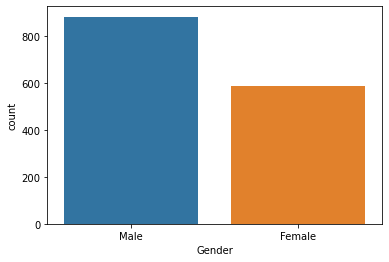

In [54]:

sns.countplot(df.Gender,order=df.Gender.value_counts().index)

* number male employee working inthe company is greater that females

In [55]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

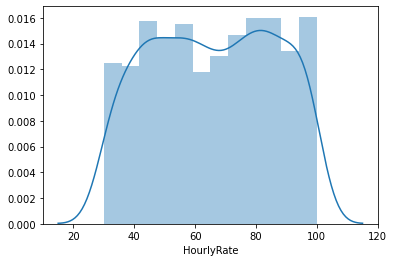

In [56]:
## Hourly rate
sns.distplot(df.HourlyRate)

* The hourly rate is uniform thoughout the employees.

In [57]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [58]:
# Job Role
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

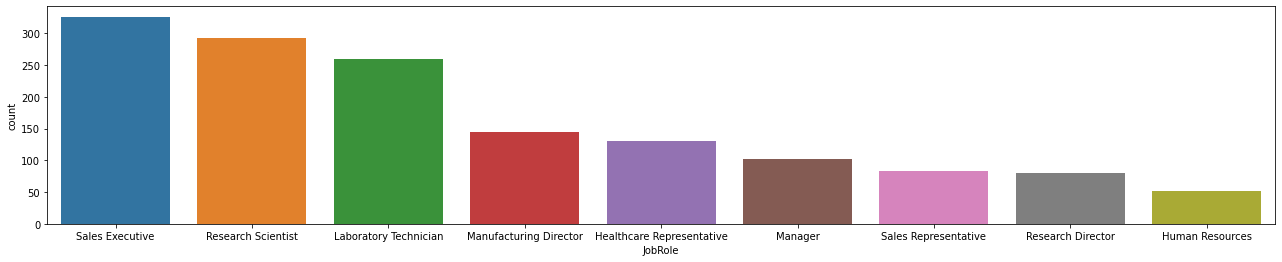

In [59]:
fig_this_large(22,4)
sns.countplot(df.JobRole,order=df.JobRole.value_counts().index)

* most of the employees are either sales executives or research scientists or Lab Tecnitian.
* in total there are 9 job roles in the company. 

In [60]:
# maritial status
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

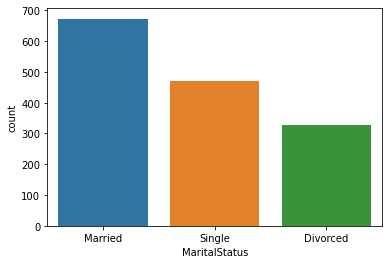

In [61]:
sns.countplot(df.MaritalStatus,order=df.MaritalStatus.value_counts().index)

* most of the employess in the company are married

In [62]:
# Target Variable Attrition
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

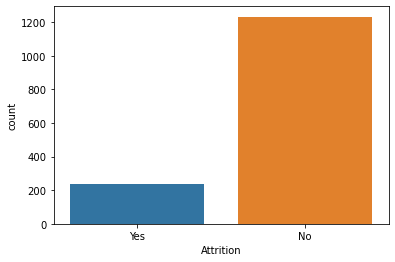

In [63]:
sns.countplot(df.Attrition)

* This dataset has imbalance classes
* A machine learning model performes well if the classes in the target variable (here, Attrition) are balanced.

* We can address imbalance classes by:
 * Using sampling methods
 * Using trees and ensemble algorithms

In [64]:
# We have covered almost all of the important features for the univariate analysis.

### Multi-variate Analysis

In [65]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [66]:
# age with attrition

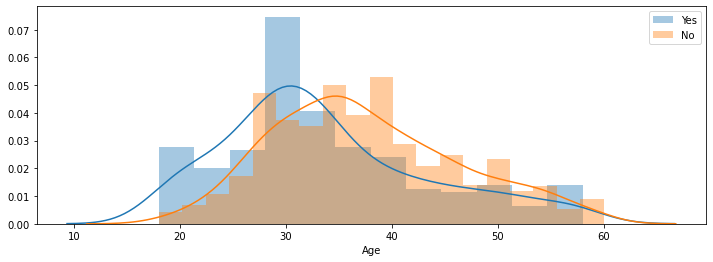

In [67]:
fig_this_large(12,4)
sns.distplot(df[df.Attrition == 'Yes']['Age'],label='Yes')
sns.distplot(df[df.Attrition == 'No']['Age'],label='No')
plt.legend()

* The younger employees are more likely to leave the company thanthe older, settled employees.

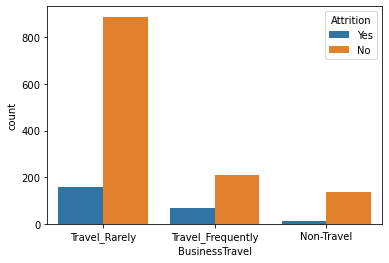

In [68]:
# travelling vs attrition
sns.countplot(df.BusinessTravel,hue=df.Attrition)

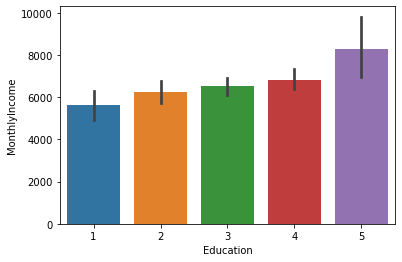

In [69]:
# Education vs monthly income
sns.barplot(df.Education,df.MonthlyIncome)

* The higher the education, the higher you salary!

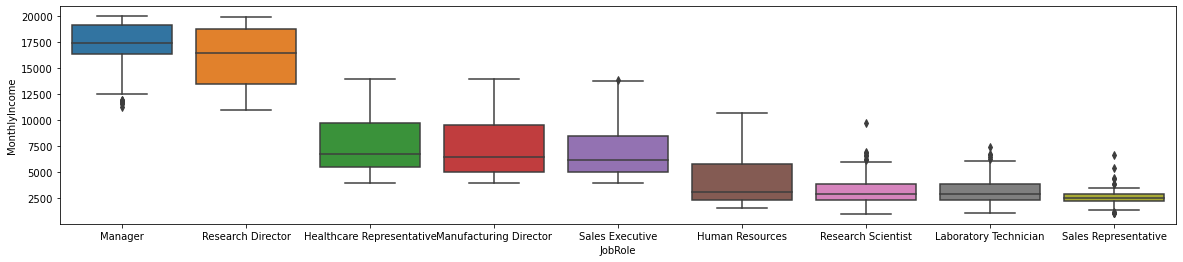

In [70]:
# jobrole vs salary
fig_this_large(20,4)
sns.boxplot(df.JobRole,df.MonthlyIncome,order=df.groupby('JobRole').mean().sort_values('MonthlyIncome',ascending=False)['MonthlyIncome'].index)

* Managers and Research Deirector are the most highly paid job roles in the company.
* HR has lot of work to do but go underpaid...

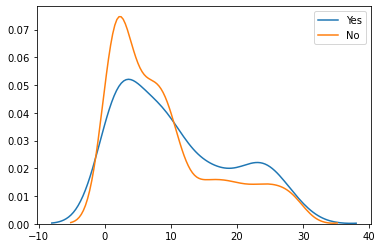

In [71]:
# does the distance from home to the company of an employee affect the attrition?
sns.kdeplot(df[df.Attrition == 'Yes']['DistanceFromHome'],label='Yes')
sns.kdeplot(df[df.Attrition == 'No']['DistanceFromHome'],label='No')
plt.legend()

* Inferences:
    * Employees residing the vicinity of the company are less like to leave the companyl
    * Employees who live far from the company are more likely to leave their to due to travel expenses.

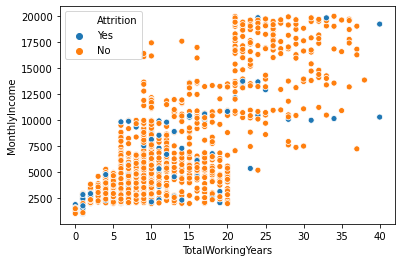

In [72]:
# total working years to montly income
sns.scatterplot(df.TotalWorkingYears,df.MonthlyIncome,hue=df.Attrition)

* The employees with less Total Working Years thus less monthly income are more likely to leave the company.
* Some employees who worked for long but weren't getting pay hike are also likely to leave the company. 

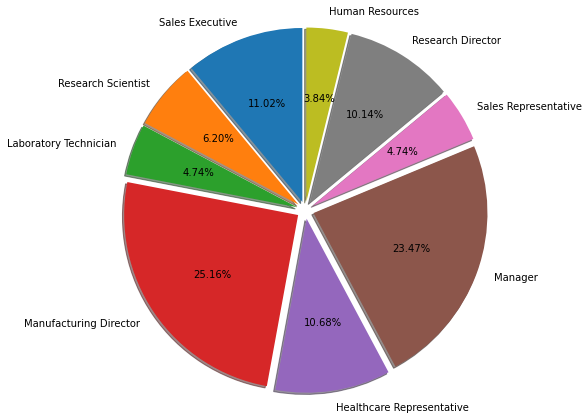

In [240]:

plt.pie(x= df.groupby('JobRole').mean()['MonthlyIncome'],labels = df.JobRole.value_counts().index,radius=2,shadow=True,explode=np.repeat(0.1,9),autopct='%1.2f%%',startangle=90);

In [253]:
## Preprocessing the data from bulding the model

# It is good practice to keep raw dataframe for visualization and process a copy of the raw dataframe and use it to build the model.
# we will create a new datarame as `df_cleaned` and preprocess it to train the model on. 

* let's remove the redundant features from the df_cleaned dataframe
* Features StandardHours,EmployeeCount,EmployeeNumber,Over18 are redundant to build the model, so we are dropping them as well.

In [486]:
df_cleaned = df.drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],1)

In [487]:
df_cleaned

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [488]:
num_features = _find_numerical_variables(df_cleaned)

In [489]:
##########################################################################################
##########################################################################################

#z_scores = stats.zscore(df_cleaned[num_features])
#
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#df_cleaned[num_features] = df_cleaned[num_features][filtered_entries]

##########################################################################################
##########################################################################################

In [490]:
# addressing the outliers in the dataset.

In [491]:
# Outliers must be always addressed before transforming the dataset toget the correct skew.
# Outliers mostly cause the feature to go skewed.

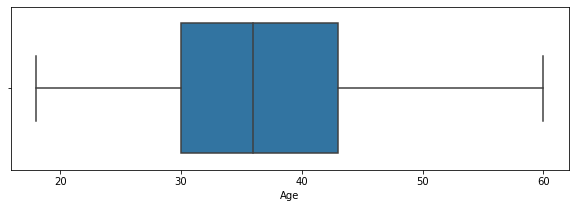

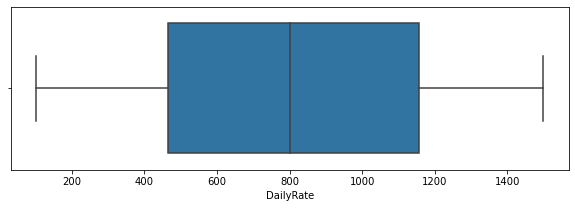

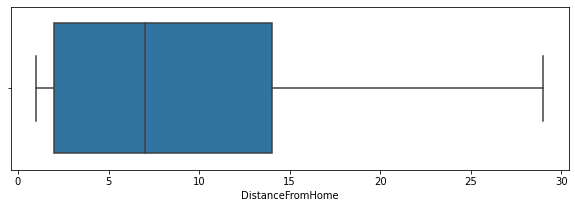

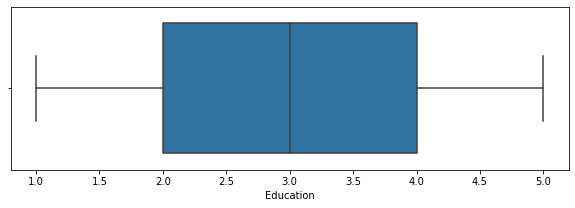

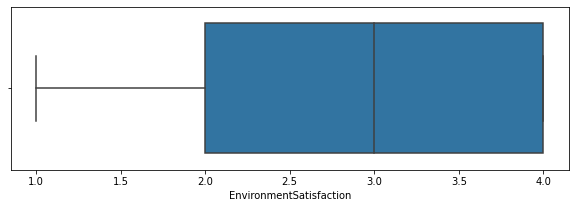

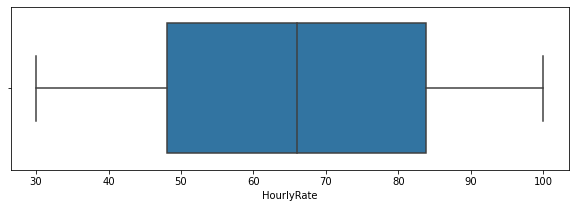

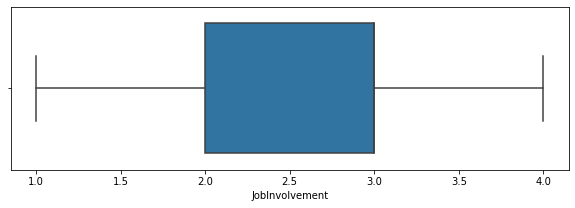

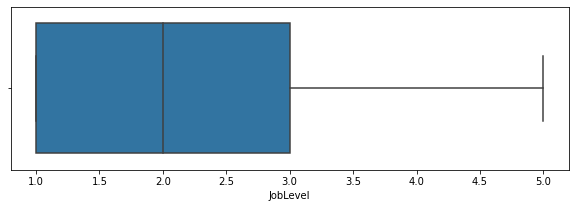

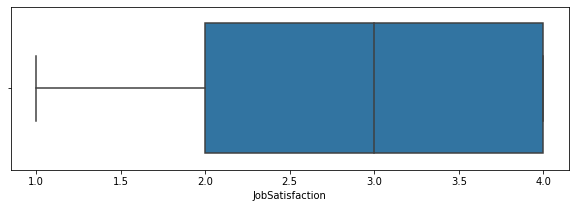

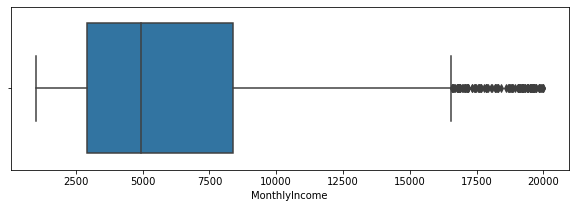

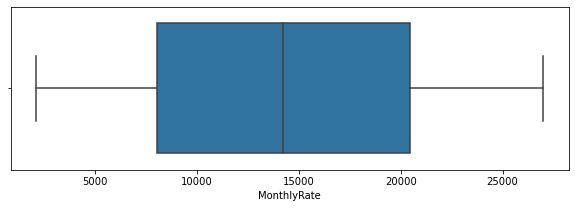

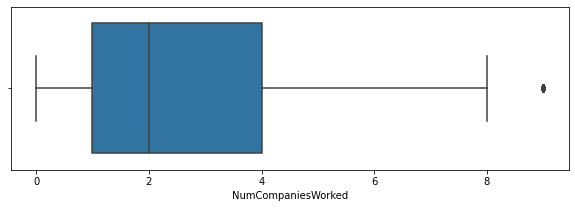

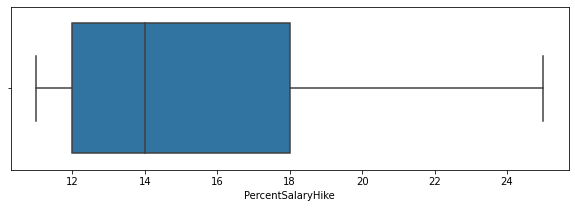

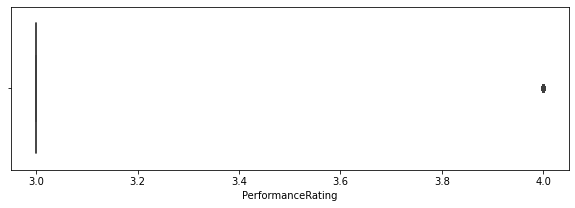

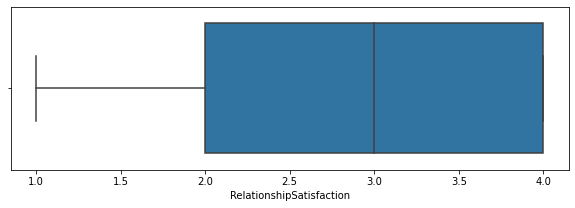

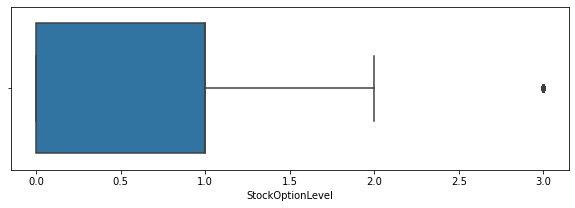

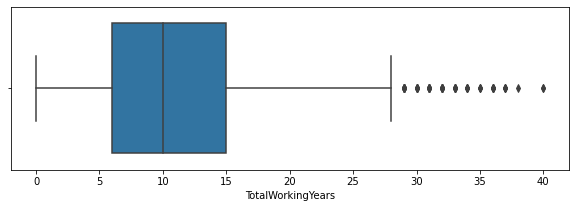

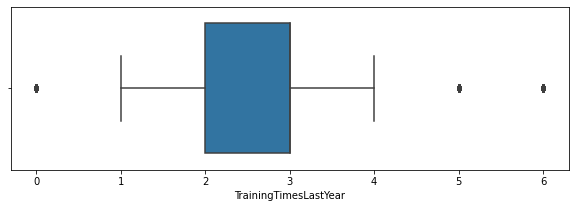

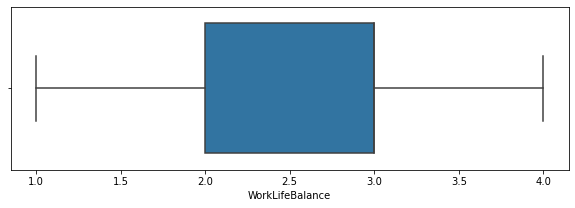

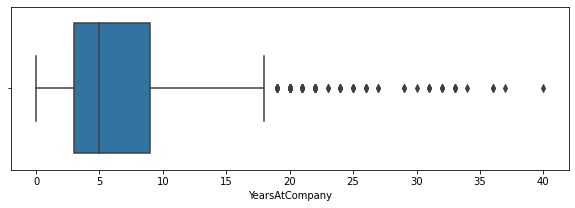

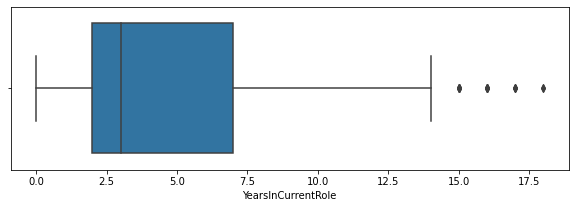

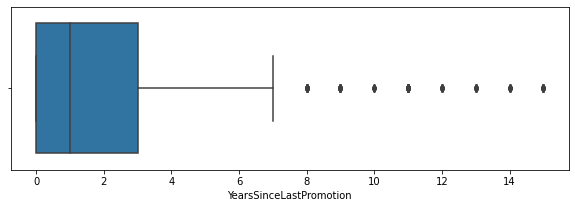

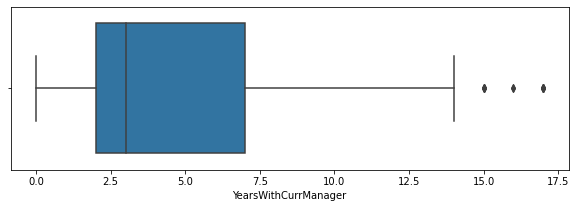

In [492]:
for col in num_features:
    fig_this_large(10,3)
    sns.boxplot(df_cleaned[col])
    plt.show()

* This dataset has some outliers, but also the data is highly skewed irrespective of the outliers for some features.

In [493]:
# let's using IQR to address the outliers in hte dataset.

Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64


In [494]:
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 3 * IQR)) |(df_cleaned > (Q3 + 3 * IQR))).any(axis=1)]

In [495]:
len(df_cleaned)

1206

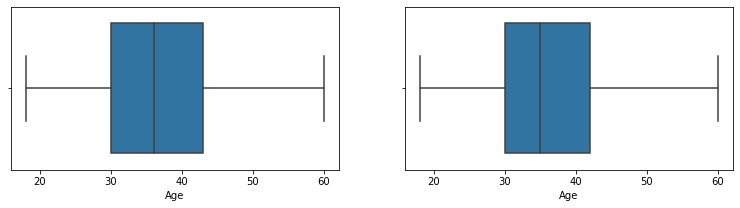

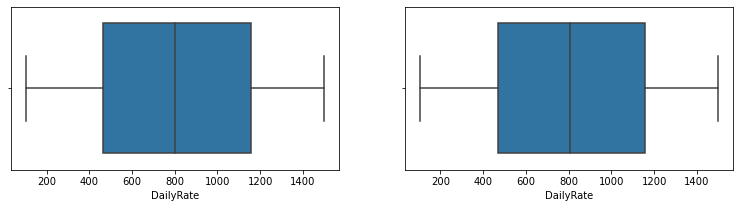

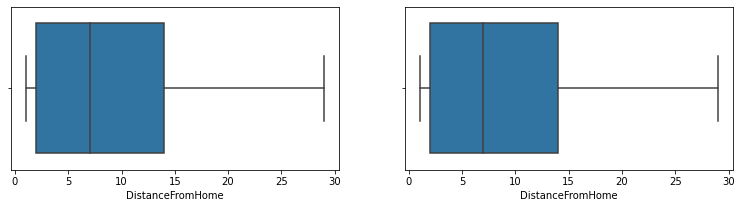

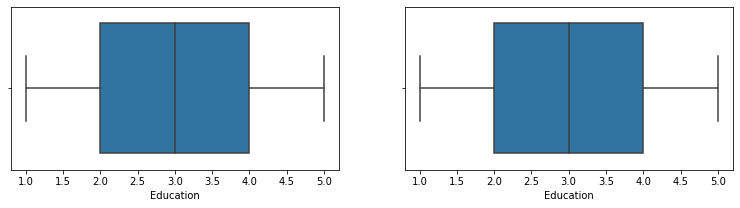

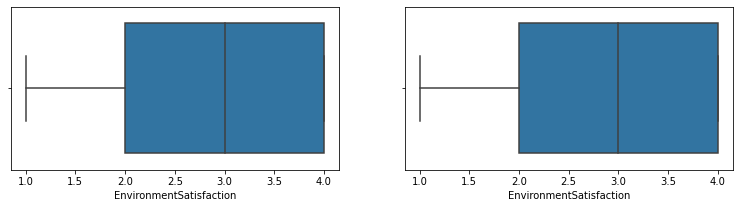

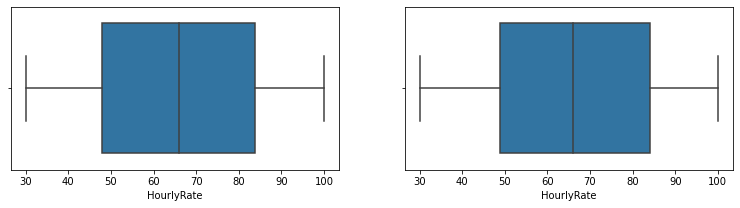

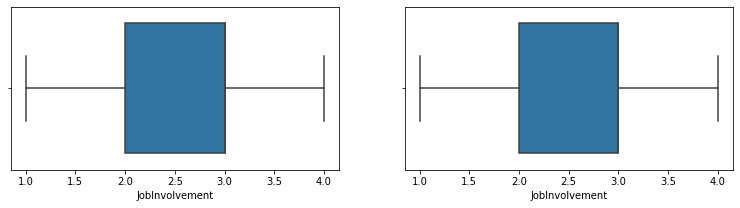

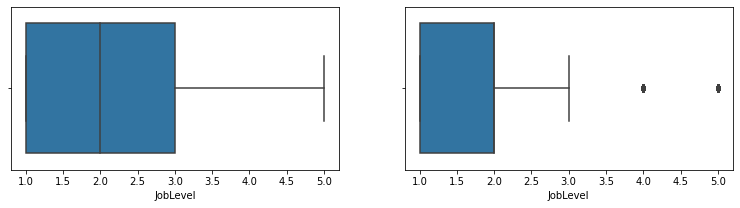

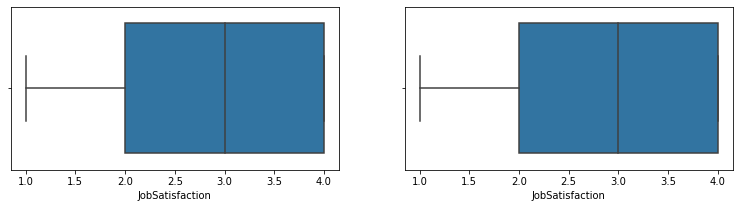

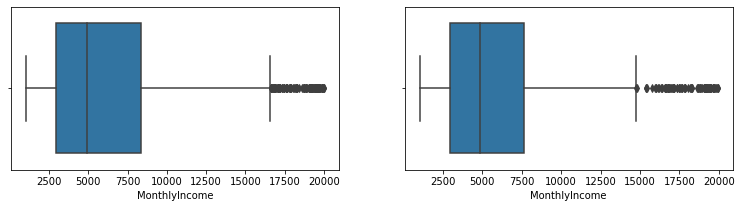

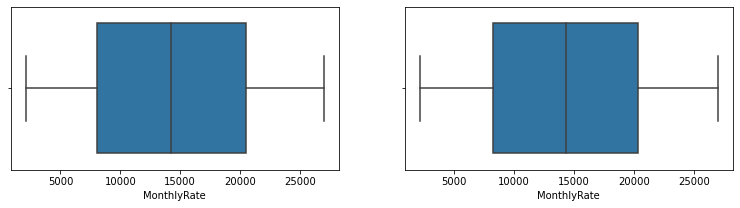

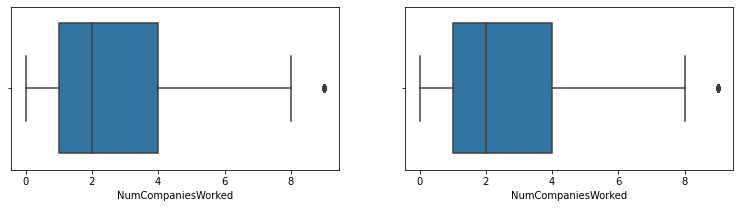

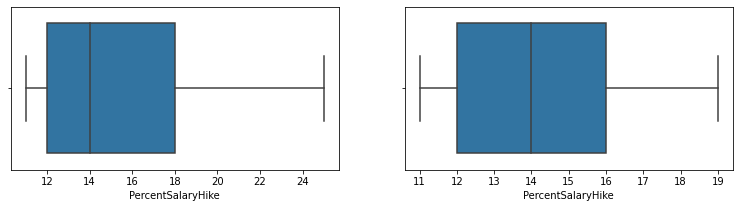

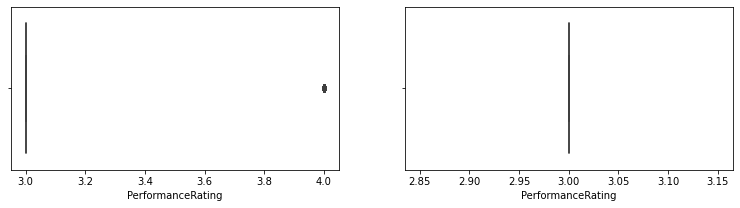

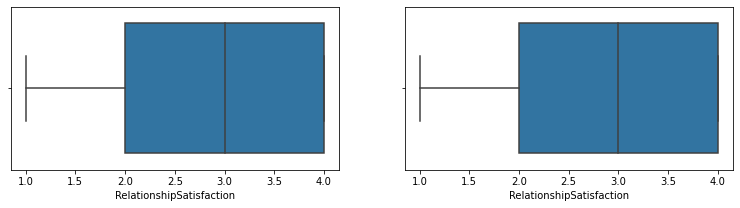

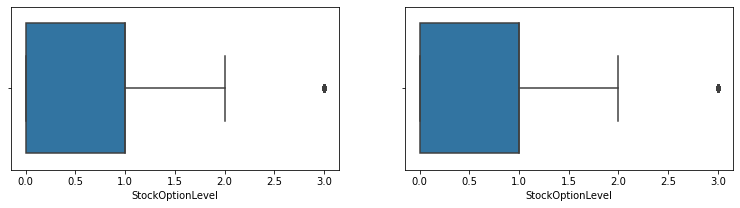

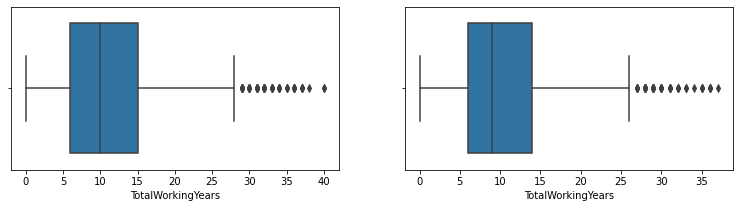

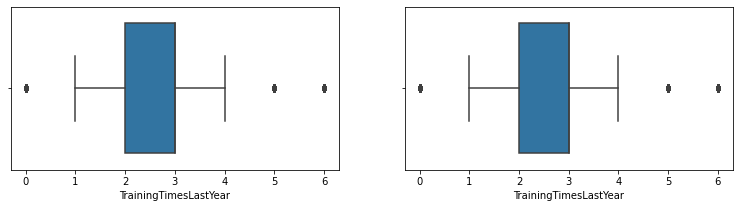

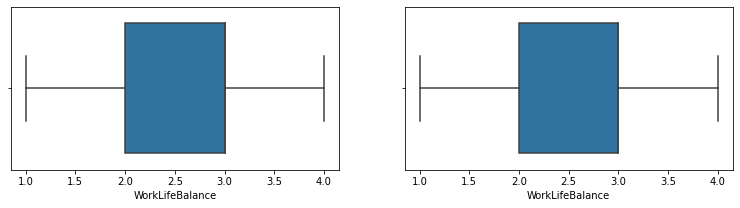

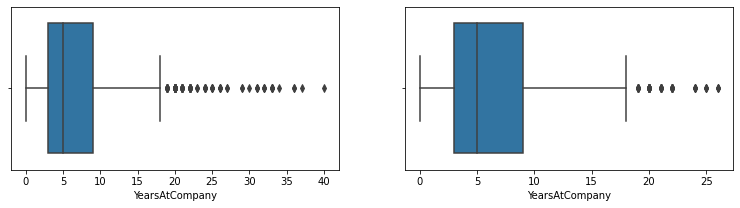

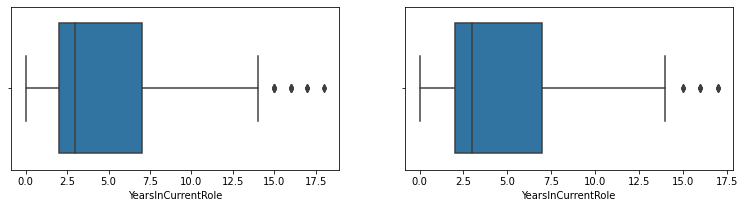

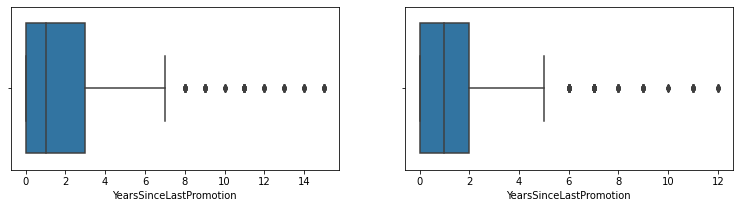

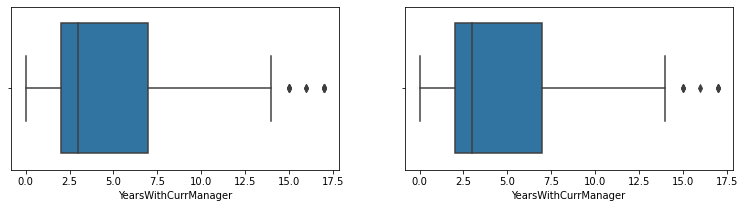

In [496]:
# Let's compare the original daframe and the raw dataframe
for col in num_features:
    fig = fig_this_large(20,3)
    
    fig.add_subplot(131)
    sns.boxplot(df[col])

    
    fig.add_subplot(132)
    sns.boxplot(df_cleaned_ext[col])
    
    plt.show()

In [497]:
# Skewness of the features:

* Skewness of the input features has a vital role in building the model especially when you have imbalance classes in the dataset.

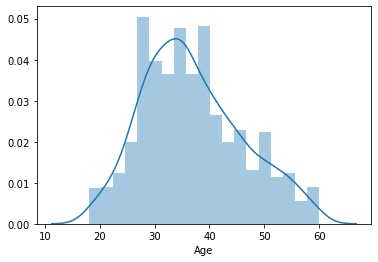

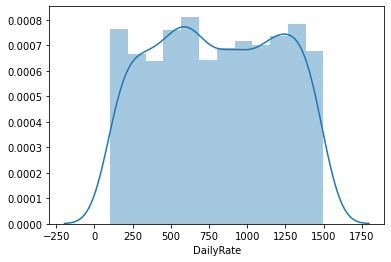

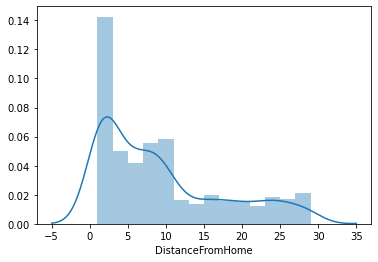

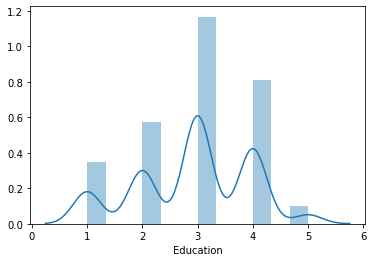

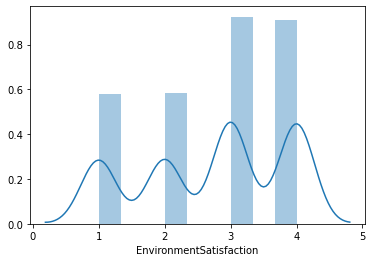

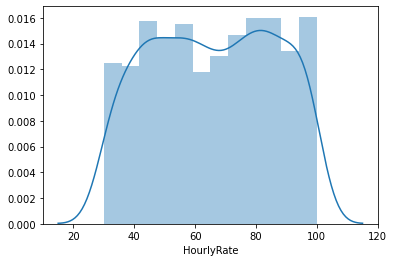

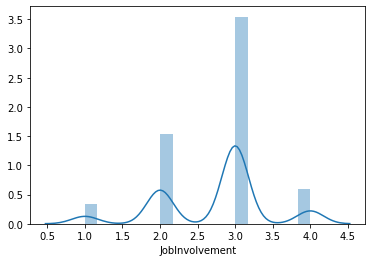

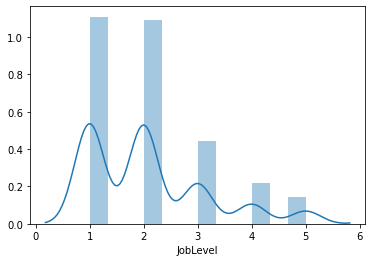

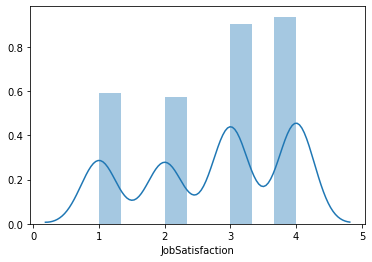

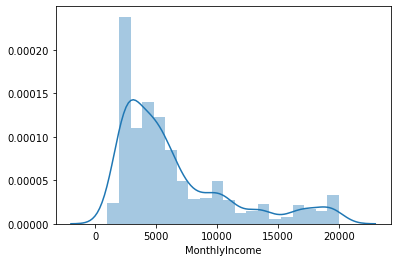

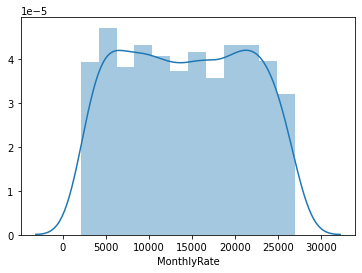

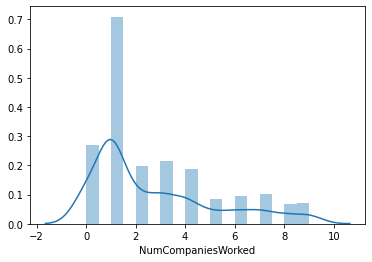

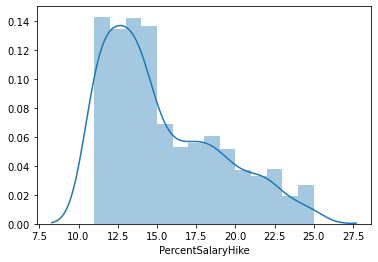

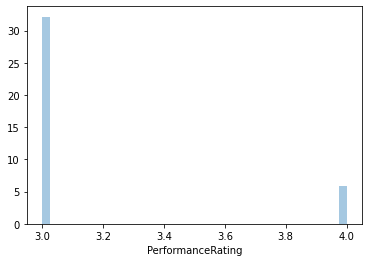

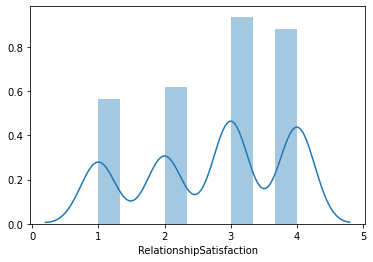

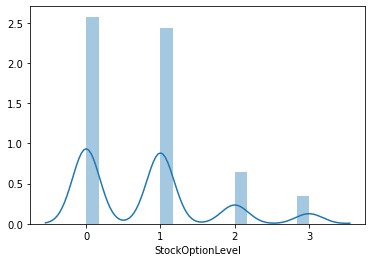

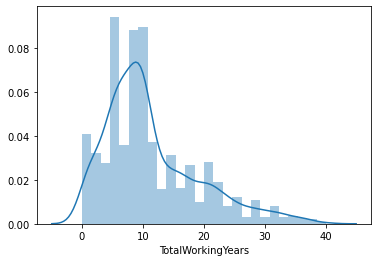

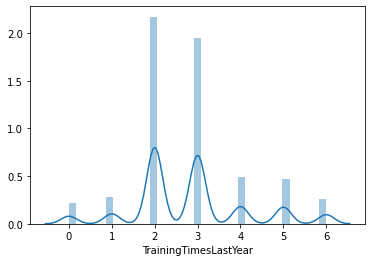

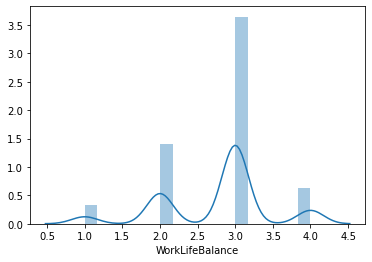

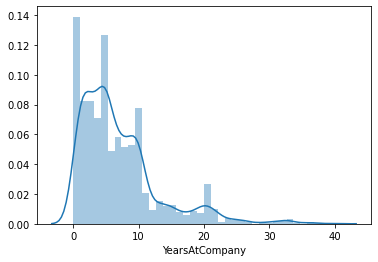

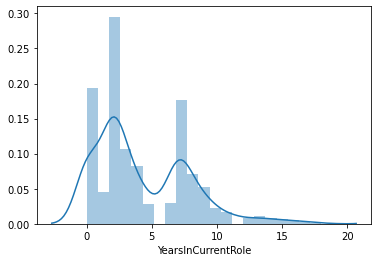

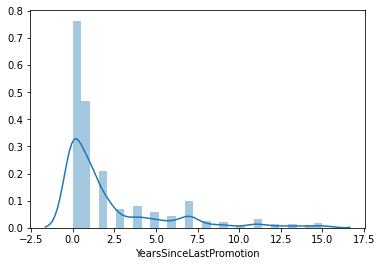

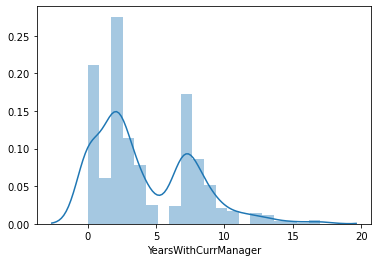

In [498]:
for col in num_features:
    sns.distplot(df[col])
    plt.show()

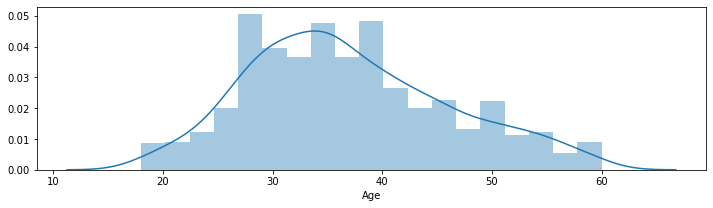

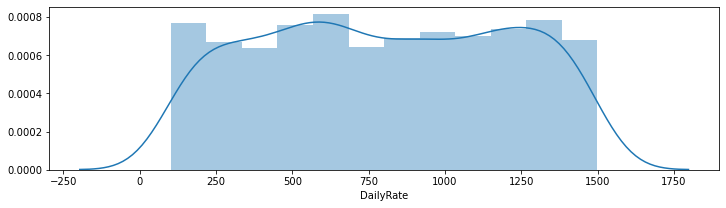

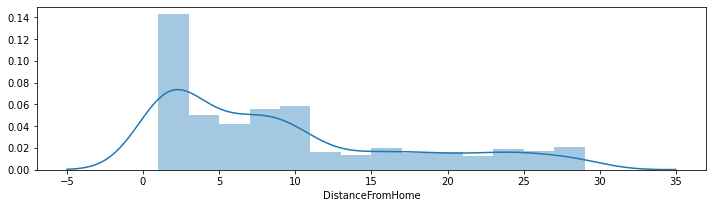

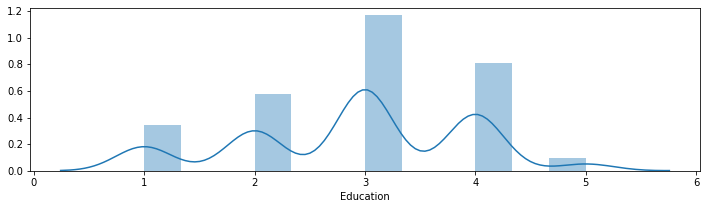

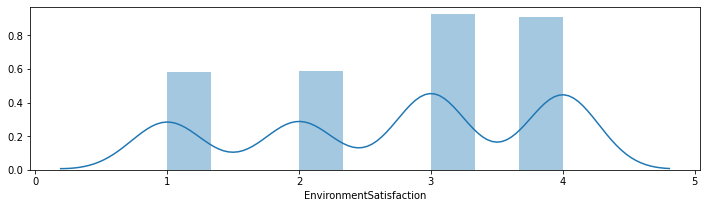

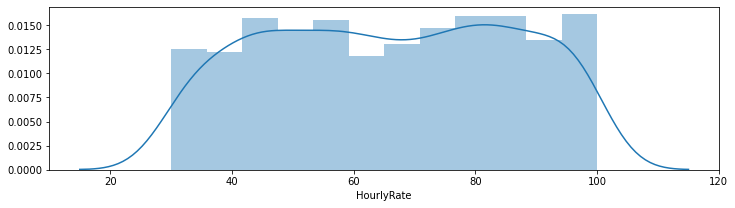

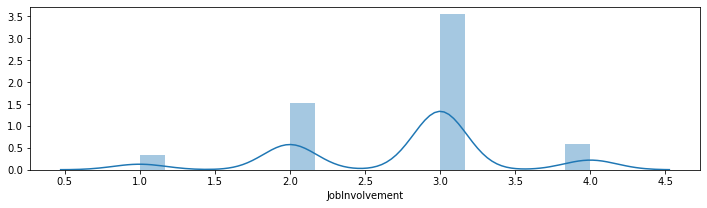

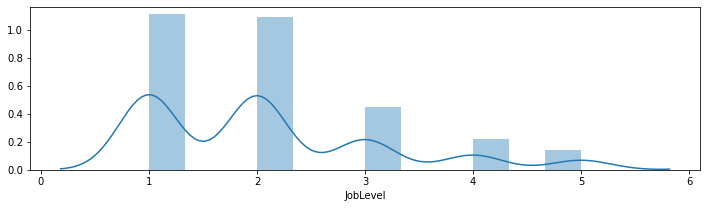

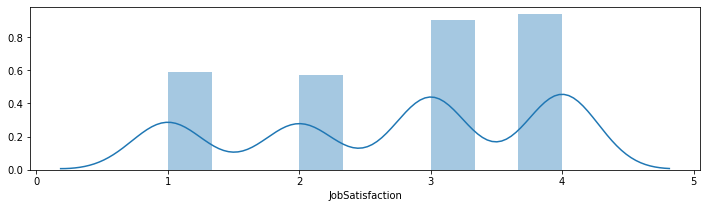

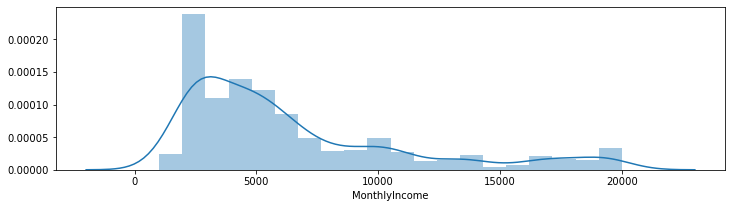

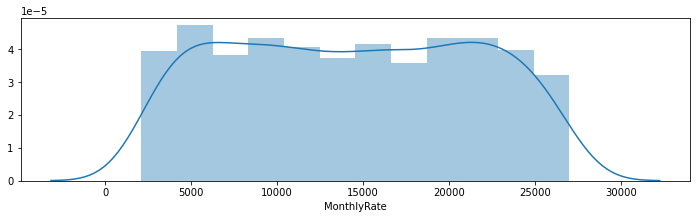

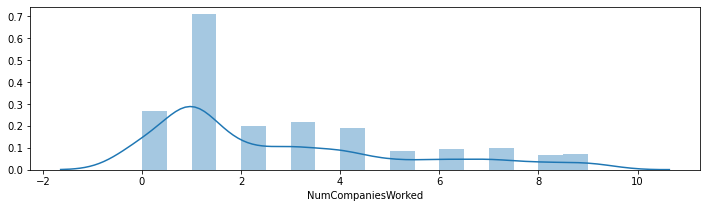

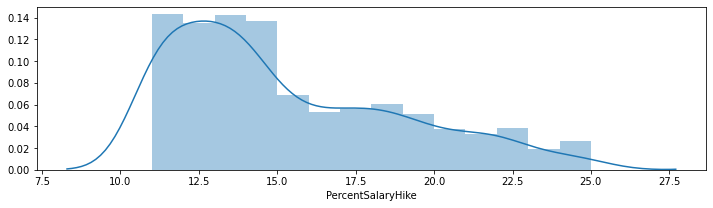

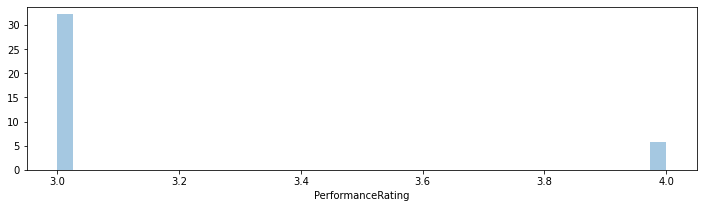

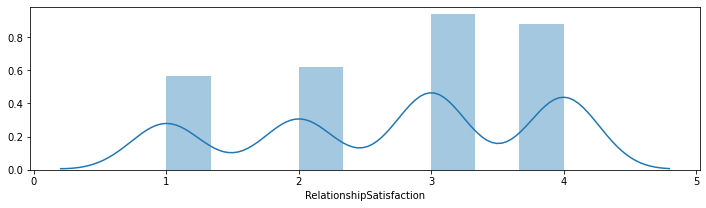

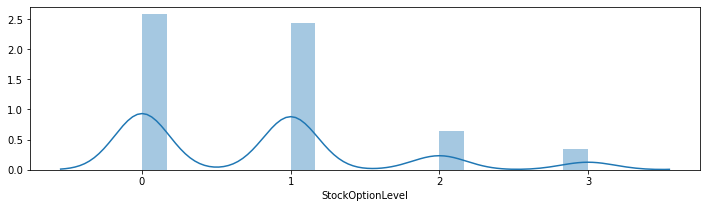

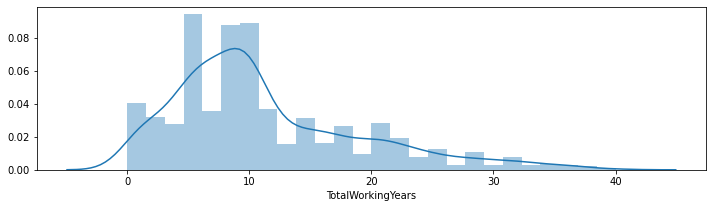

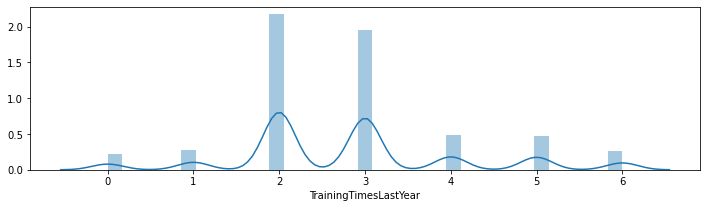

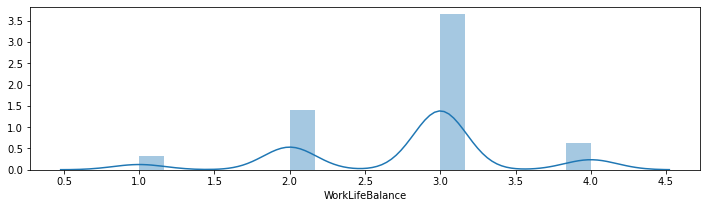

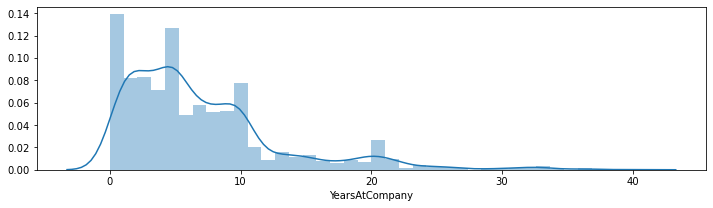

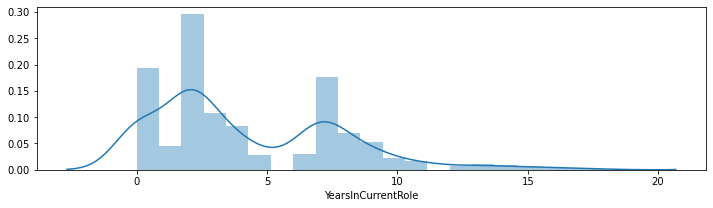

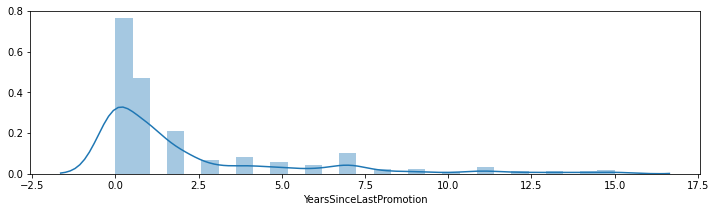

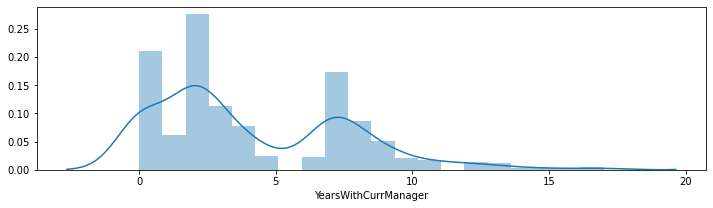

In [499]:
# get the distribution of each of the features in the dataset
for col in num_features:
    fig_this_large(12,3)
    sns.distplot(df[col])
    plt.show()

In [500]:
# skew stats
df_cleaned.skew()

Age                         0.433475
DailyRate                  -0.019154
DistanceFromHome            0.972771
Education                  -0.311870
EnvironmentSatisfaction    -0.328554
HourlyRate                 -0.022233
JobInvolvement             -0.492983
JobLevel                    1.087102
JobSatisfaction            -0.340888
MonthlyIncome               1.479647
MonthlyRate                 0.006231
NumCompaniesWorked          1.014020
PercentSalaryHike           0.583541
PerformanceRating           0.000000
RelationshipSatisfaction   -0.306168
StockOptionLevel            0.971111
TotalWorkingYears           1.084812
TrainingTimesLastYear       0.574283
WorkLifeBalance            -0.530803
YearsAtCompany              1.333466
YearsInCurrentRole          0.913143
YearsSinceLastPromotion     1.779690
YearsWithCurrManager        0.864407
dtype: float64

* Most of the features are positively skewed.
* We can use sqare root and log transformation

In [501]:
np.sqrt(df_cleaned[num_features]+1).skew()

Age                         0.164066
DailyRate                  -0.424251
DistanceFromHome            0.486174
Education                  -0.594470
EnvironmentSatisfaction    -0.498064
HourlyRate                 -0.223741
JobInvolvement             -0.813049
JobLevel                    0.763207
JobSatisfaction            -0.509100
MonthlyIncome               0.921056
MonthlyRate                -0.367874
NumCompaniesWorked          0.581471
PercentSalaryHike           0.477139
PerformanceRating           0.000000
RelationshipSatisfaction   -0.479750
StockOptionLevel            0.595650
TotalWorkingYears           0.312664
TrainingTimesLastYear      -0.119456
WorkLifeBalance            -0.855709
YearsAtCompany              0.519572
YearsInCurrentRole          0.277093
YearsSinceLastPromotion     1.207032
YearsWithCurrManager        0.272709
dtype: float64

* The log feature transformation is leading to Nan values.
* The sqrt transformation is giving pretty good resutlts

In [502]:
df_cleaned[num_features] = np.sqrt(df_cleaned[num_features])

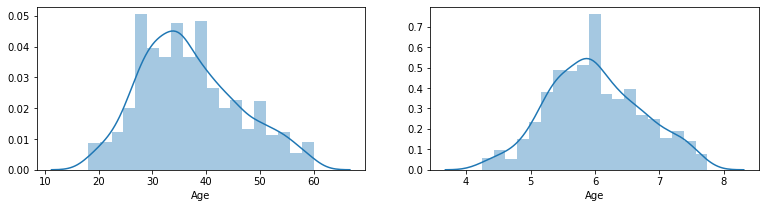

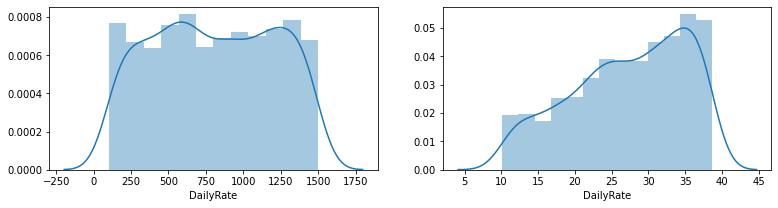

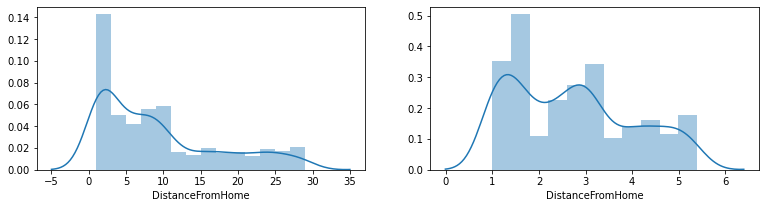

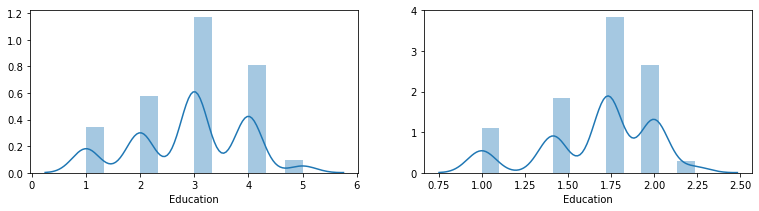

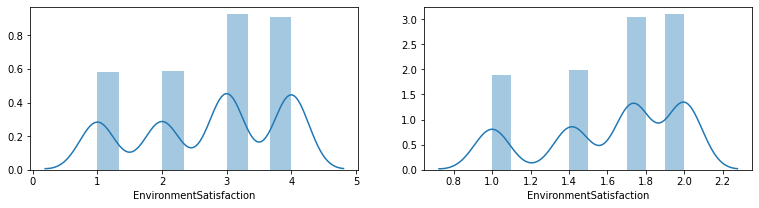

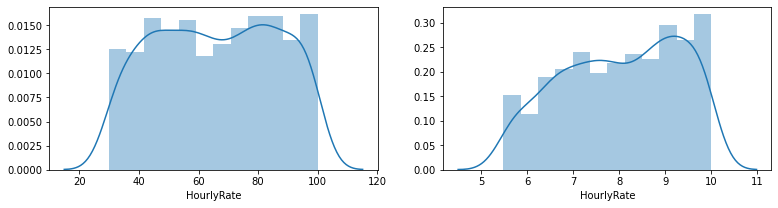

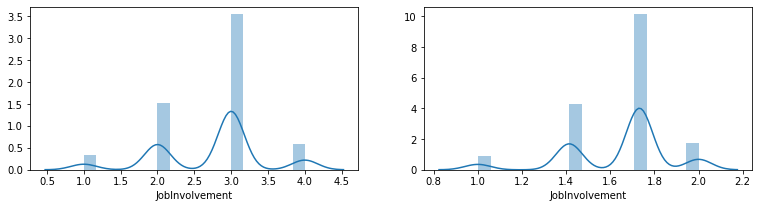

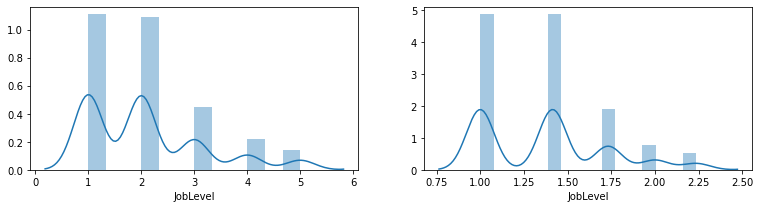

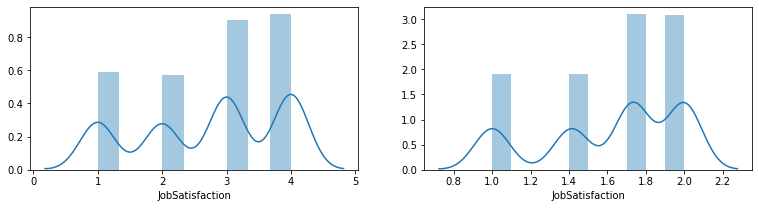

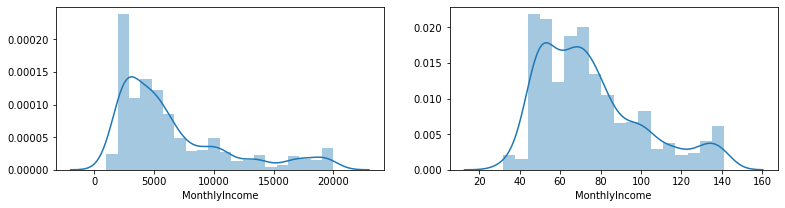

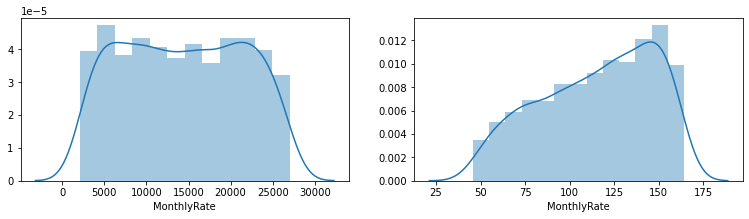

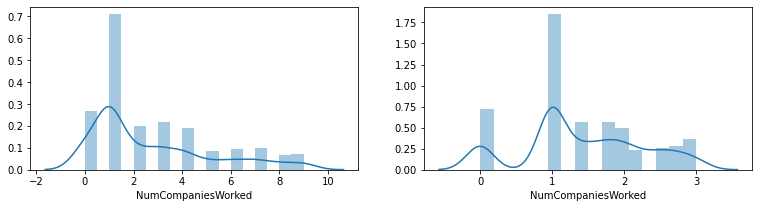

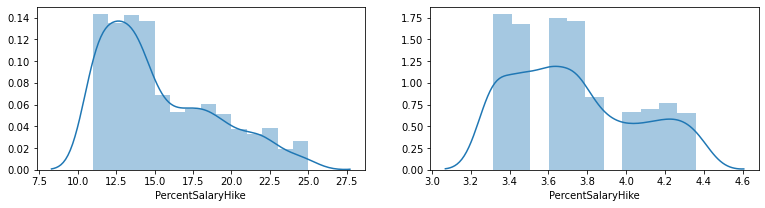

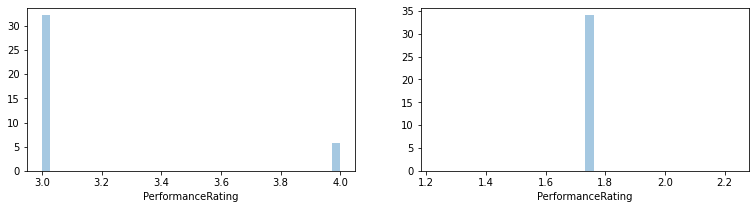

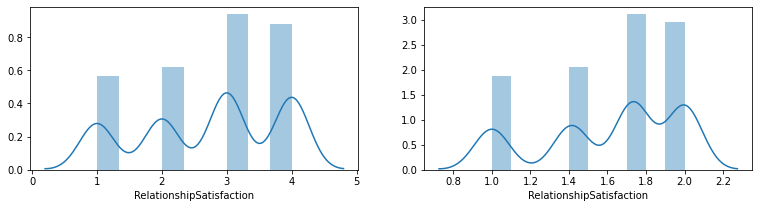

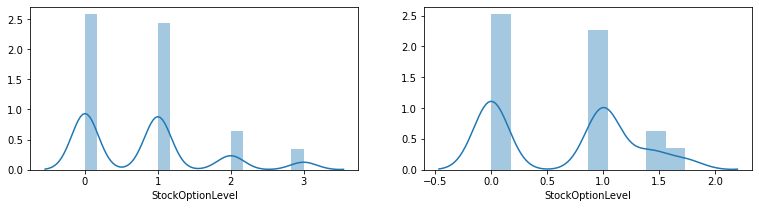

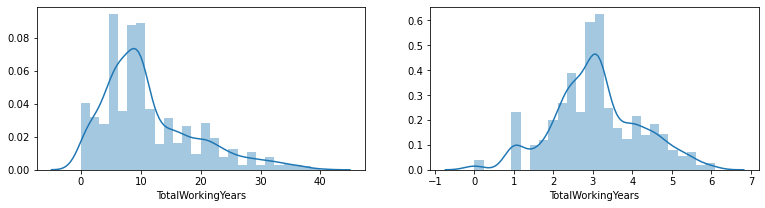

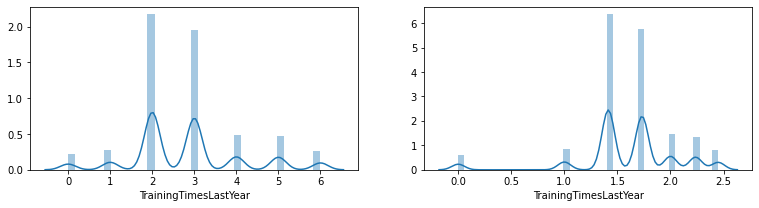

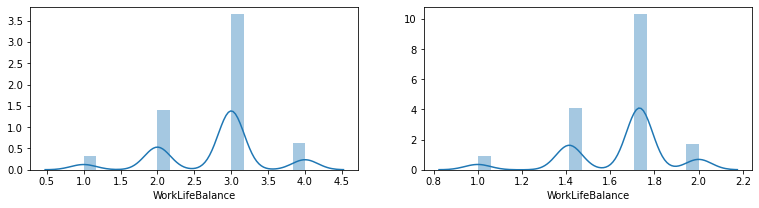

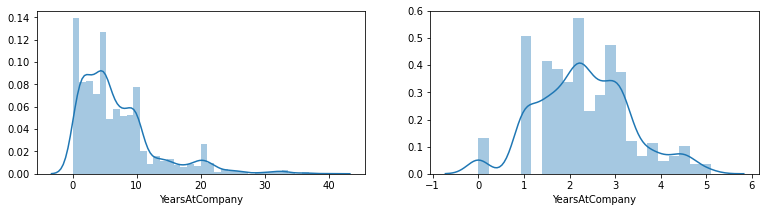

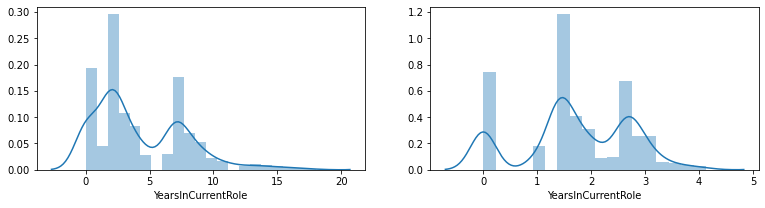

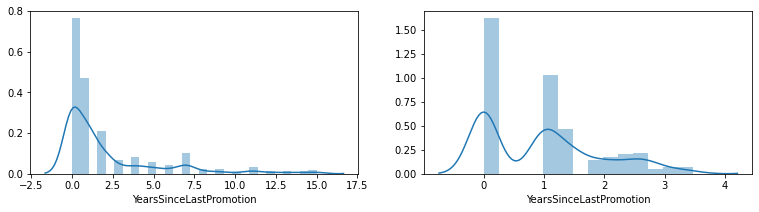

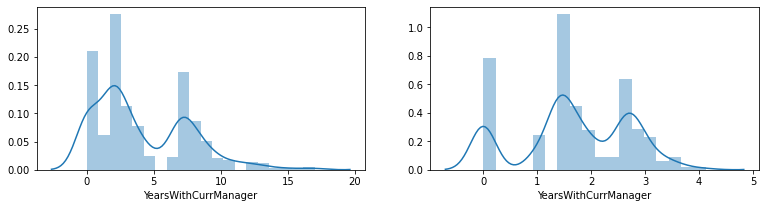

In [503]:
# comparing the skew
for col in num_features:
    fig = fig_this_large(20,3)
    
    fig.add_subplot(131)
    sns.distplot(df[col])

    
    fig.add_subplot(132)
    sns.distplot(df_cleaned[col])
    
    plt.show()

In [504]:
# We can drop performance rating from the processing dataframe.
df_cleaned.drop('PerformanceRating',1,inplace=True)

## Building the model

In [505]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [506]:
df_cleaned

Age Attrition     BusinessTravel  DailyRate  \
0     6.403124       Yes      Travel_Rarely  33.196385   
2     6.082763       Yes      Travel_Rarely  37.054015   
3     5.744563        No  Travel_Frequently  37.309516   
4     5.196152        No      Travel_Rarely  24.310492   
5     5.656854        No  Travel_Frequently  31.701735   
...        ...       ...                ...        ...   
1464  5.099020        No      Travel_Rarely  34.161382   
1465  6.000000        No  Travel_Frequently  29.732137   
1466  6.244998        No      Travel_Rarely  24.758837   
1468  7.000000        No  Travel_Frequently  31.984371   
1469  5.830952        No      Travel_Rarely  25.059928   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales          1.000000   1.414214  Life Sciences   
2     Research & Development          1.414214   1.414214          Other   
3     Research & Development          1.732051   2.000000  Life Sciences   
4     Research & Development          1.414214   1.000000        Medical   
5     Research & Development          1.414214   1.414214  Life Sciences   
...                      ...               ...        ...            ...   
1464                   Sales          2.236068   1.732051          Other   
1465  Research & Development          4.795832   1.414214        Medical   
1466  Research & Development          2.449490   1.000000        Medical   
1468                   Sales          1.414214   1.732051        Medical   
1469  Research & Development          2.828427   1.732051        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                    1.414214  Female    9.695360        1.732051  1.414214   
2                    2.000000    Male    9.591663        1.414214  1.000000   
3                    2.000000  Female    7.483315        1.732051  1.000000   
4                    1.000000    Male    6.324555        1.732051  1.000000   
5                    2.000000    Male    8.888194        1.732051  1.000000   
...                       ...     ...         ...             ...       ...   
1464                 2.000000  Female    5.477226        1.414214  1.000000   
1465                 1.732051    Male    6.403124        2.000000  1.414214   
1466                 2.000000    Male    6.480741        1.414214  1.732051   
1468                 2.000000    Male    7.937254        1.414214  1.414214   
1469                 1.414214    Male    9.055385        2.000000  1.414214   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0               Sales Executive         2.000000        Single      77.414469   
2         Laboratory Technician         1.732051        Single      45.716518   
3            Research Scientist         1.732051       Married      53.935146   
4         Laboratory Technician         1.414214       Married      58.889727   
5         Laboratory Technician         2.000000        Single      55.389530   
...                         ...              ...           ...            ...   
1464       Sales Representative         1.732051        Single      54.460995   
1465      Laboratory Technician         2.000000       Married      50.705029   
1466  Healthcare Representative         1.000000       Married      99.954990   
1468            Sales Executive         1.414214       Married      73.416619   
1469      Laboratory Technician         1.732051       Married      66.362640   

      MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0      139.567188            2.828427      Yes           3.316625   
2       48.948953            2.449490      Yes           3.872983   
3      152.180814            1.000000      Yes           3.316625   
4      128.965112            3.000000       No           3.464102   
5      108.921990            0.000000       No           3.605551   
...           ...                 ...      ...                ...

In [507]:
# Categorical Variables Encoding

In [508]:
# variables to nomial endoing

In [509]:
df_cleaned.Attrition = df_cleaned.Attrition.apply(lambda x:0 if x=='No' else 1)
df_cleaned.Gender = df_cleaned.Gender.apply(lambda x:1 if x=='Male' else 0)
df_cleaned.OverTime = df_cleaned.OverTime.apply(lambda x:1 if x=='Yes' else 0)


In [510]:
df_cleaned

Age  Attrition     BusinessTravel  DailyRate  \
0     6.403124          1      Travel_Rarely  33.196385   
2     6.082763          1      Travel_Rarely  37.054015   
3     5.744563          0  Travel_Frequently  37.309516   
4     5.196152          0      Travel_Rarely  24.310492   
5     5.656854          0  Travel_Frequently  31.701735   
...        ...        ...                ...        ...   
1464  5.099020          0      Travel_Rarely  34.161382   
1465  6.000000          0  Travel_Frequently  29.732137   
1466  6.244998          0      Travel_Rarely  24.758837   
1468  7.000000          0  Travel_Frequently  31.984371   
1469  5.830952          0      Travel_Rarely  25.059928   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales          1.000000   1.414214  Life Sciences   
2     Research & Development          1.414214   1.414214          Other   
3     Research & Development          1.732051   2.000000  Life Sciences   
4     Research & Development          1.414214   1.000000        Medical   
5     Research & Development          1.414214   1.414214  Life Sciences   
...                      ...               ...        ...            ...   
1464                   Sales          2.236068   1.732051          Other   
1465  Research & Development          4.795832   1.414214        Medical   
1466  Research & Development          2.449490   1.000000        Medical   
1468                   Sales          1.414214   1.732051        Medical   
1469  Research & Development          2.828427   1.732051        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                    1.414214       0    9.695360        1.732051  1.414214   
2                    2.000000       1    9.591663        1.414214  1.000000   
3                    2.000000       0    7.483315        1.732051  1.000000   
4                    1.000000       1    6.324555        1.732051  1.000000   
5                    2.000000       1    8.888194        1.732051  1.000000   
...                       ...     ...         ...             ...       ...   
1464                 2.000000       0    5.477226        1.414214  1.000000   
1465                 1.732051       1    6.403124        2.000000  1.414214   
1466                 2.000000       1    6.480741        1.414214  1.732051   
1468                 2.000000       1    7.937254        1.414214  1.414214   
1469                 1.414214       1    9.055385        2.000000  1.414214   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0               Sales Executive         2.000000        Single      77.414469   
2         Laboratory Technician         1.732051        Single      45.716518   
3            Research Scientist         1.732051       Married      53.935146   
4         Laboratory Technician         1.414214       Married      58.889727   
5         Laboratory Technician         2.000000        Single      55.389530   
...                         ...              ...           ...            ...   
1464       Sales Representative         1.732051        Single      54.460995   
1465      Laboratory Technician         2.000000       Married      50.705029   
1466  Healthcare Representative         1.000000       Married      99.954990   
1468            Sales Executive         1.414214       Married      73.416619   
1469      Laboratory Technician         1.732051       Married      66.362640   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0      139.567188            2.828427         1           3.316625   
2       48.948953            2.449490         1           3.872983   
3      152.180814            1.000000         1           3.316625   
4      128.965112            3.000000         0           3.464102   
5      108.921990            0.000000         0           3.605551   
...           ...                 ...       ...

In [511]:
# cleaned categorical features
cat_features = _find_categorical_variables(df_cleaned)

In [512]:
cat_features

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [513]:
# one hot encoding the data
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
one_hot_enc = OneHotCategoricalEncoder(variables=cat_features)
df_cleaned = one_hot_enc.fit_transform(df_cleaned)

In [514]:
df_cleaned.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  6.403124          1  33.196385          1.000000   1.414214   
2  6.082763          1  37.054015          1.414214   1.414214   
3  5.744563          0  37.309516          1.732051   2.000000   
4  5.196152          0  24.310492          1.414214   1.000000   
5  5.656854          0  31.701735          1.414214   1.414214   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                 1.414214       0    9.695360        1.732051  1.414214   
2                 2.000000       1    9.591663        1.414214  1.000000   
3                 2.000000       0    7.483315        1.732051  1.000000   
4                 1.000000       1    6.324555        1.732051  1.000000   
5                 2.000000       1    8.888194        1.732051  1.000000   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0         2.000000      77.414469   139.567188            2.828427         1   
2         1.732051      45.716518    48.948953            2.449490         1   
3         1.732051      53.935146   152.180814            1.000000         1   
4         1.414214      58.889727   128.965112            3.000000         0   
5         2.000000      55.389530   108.921990            0.000000         0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0           3.316625                  1.000000               0.0   
2           3.872983                  1.414214               0.0   
3           3.316625                  1.732051               0.0   
4           3.464102                  2.000000               1.0   
5           3.605551                  1.732051               0.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           2.828427               0.000000         1.000000        2.449490   
2           2.645751               1.732051         1.732051        0.000000   
3           2.828427               1.732051         1.732051        2.828427   
4           2.449490               1.732051         1.732051        1.414214   
5           2.828427               1.414214         1.414214        2.645751   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            2.000000                 0.000000              2.236068   
2            0.000000                 0.000000              0.000000   
3            2.645751                 1.732051              0.000000   
4            1.414214                 1.414214              1.414214   
5            2.645751                 1.732051              2.449490   

   BusinessTravel_Travel_Rarely  BusinessTravel_Travel_Frequently  \
0                             1                                 0   
2                             1                                 0   
3                             0                                 1   
4                             1                                 0   
5                             0                                 1   

   BusinessTravel_Non-Travel  Department_Sales  \
0                          0                 1   
2                          0                 0   
3                          0                 0   
4                          0                 0   
5                          0                 0   

   Department_Research & Development  Department_Human Resources  \
0                                  0                           0   
2                                  1                           0   
3                                  1                           0   
4                                  1                           0   
5                                  1                           0   

   EducationField_Life Sciences  EducationField_Other  EducationField_Medical  \
0                             1                     0                       0   
2                             0                     1          

In [515]:
# split X and y 
X = df_cleaned.drop('Attrition',1)
y = df_cleaned['Attrition']

In [516]:
len(df),len(df_cleaned)

(1470, 1206)

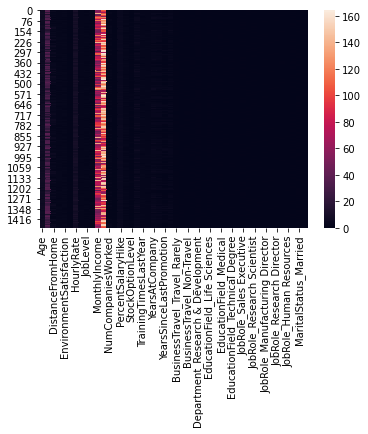

In [517]:
sns.heatmap(X)

* Standard Scaling is needed are some features are of very high numerical value which could lead to biases features in the model.

In [518]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [519]:
# check the shapes:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((844, 48), (844,), (362, 48), (362,))

In [520]:
to_scale_features = 'Age DailyRate DistanceFromHome Education EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel JobSatisfaction MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike RelationshipSatisfaction TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager'.split()   

In [521]:
# standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('scalar',StandardScaler(),to_scale_features)],remainder='passthrough')

In [522]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [523]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((844, 48), (844,), (362, 48), (362,))

* We will use ensemble techniques on this models as:
    * The target variable has imbalance classes.
    * When we have many features it's good to start with ensemble techniques

In [524]:
# importing the training dependencies:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [560]:
# importing the evaluation metrics despendencies
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,auc,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,roc_auc_score

In [526]:
# training the model:

In [527]:
# helper function
def train_n_ret_scores(model):
    """
    Input: model for fitting the data.
    Output: scores on the test set
    """
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    print(classification_report(y_test,y_preds))
    

In [528]:
# try1: Decision Tree

train_n_ret_scores(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       293
           1       0.38      0.30      0.34        69

    accuracy                           0.77       362
   macro avg       0.61      0.59      0.60       362
weighted avg       0.75      0.77      0.76       362



In [529]:
# try2: Random Forest

train_n_ret_scores(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       0.86      0.09      0.16        69

    accuracy                           0.82       362
   macro avg       0.84      0.54      0.53       362
weighted avg       0.83      0.82      0.76       362



In [530]:
# try3: Gradient Boost

train_n_ret_scores(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       293
           1       0.67      0.20      0.31        69

    accuracy                           0.83       362
   macro avg       0.75      0.59      0.61       362
weighted avg       0.81      0.83      0.79       362



In [531]:
# try4: AdaAdaBoostClassifier

train_n_ret_scores(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       293
           1       0.63      0.25      0.35        69

    accuracy                           0.83       362
   macro avg       0.74      0.61      0.63       362
weighted avg       0.80      0.83      0.80       362



In [532]:
# Let's do an Adaboost with base Gradient Boost
# try5: AdaAdaBoostClassifier with base as Gradient Boost

train_n_ret_scores(AdaBoostClassifier(RandomForestClassifier()))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       0.86      0.09      0.16        69

    accuracy                           0.82       362
   macro avg       0.84      0.54      0.53       362
weighted avg       0.83      0.82      0.76       362



In [533]:
# try6: SVR

train_n_ret_scores(SVC())

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       293
           1       0.89      0.12      0.21        69

    accuracy                           0.83       362
   macro avg       0.86      0.56      0.55       362
weighted avg       0.84      0.83      0.77       362



In [534]:
# try7: Gaussian NB

train_n_ret_scores(GaussianNB())

              precision    recall  f1-score   support

           0       0.94      0.33      0.49       293
           1       0.24      0.91      0.38        69

    accuracy                           0.44       362
   macro avg       0.59      0.62      0.44       362
weighted avg       0.81      0.44      0.47       362



In [535]:
# try8: KNN

train_n_ret_scores(KNeighborsClassifier(n_neighbors=5))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       293
           1       0.78      0.10      0.18        69

    accuracy                           0.82       362
   macro avg       0.80      0.55      0.54       362
weighted avg       0.82      0.82      0.76       362



In [536]:
# try9 : Logistic

train_n_ret_scores(LogisticRegression())

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       293
           1       0.73      0.35      0.47        69

    accuracy                           0.85       362
   macro avg       0.80      0.66      0.69       362
weighted avg       0.84      0.85      0.83       362



In [537]:
# Let's create a dataframe of get the cross val scores of the above algorithms with the K fold = 10

In [538]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(X_train,y_train)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    y_preds = model.predict(X_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

In [561]:
models_df

Train_Acc  Test_Acc  Precision    Recall  \
Model                                                                  
LogisticRegression           0.905213  0.850829   0.727273  0.347826   
DecisionTreeClassifier       1.000000  0.790055   0.425532  0.289855   
RandomForestClassifier       1.000000  0.825967   0.875000  0.101449   
GradientBoostingClassifier   0.978673  0.831492   0.681818  0.217391   
AdaBoostClassifier           0.912322  0.828729   0.629630  0.246377   
KNeighborsClassifier         0.876777  0.823204   0.777778  0.101449   
SVC                          0.918246  0.828729   0.888889  0.115942   
GaussianNB                   0.412322  0.441989   0.243243  0.913043   

                            F1_score    Avg_CV  
Model                                           
LogisticRegression          0.470588  0.874050  
DecisionTreeClassifier      0.344828  0.792672  
RandomForestClassifier      0.181818  0.852507  
GradientBoostingClassifier  0.329670  0.862445  
AdaBoostClassifier          0.354167  0.874862  
KNeighborsClassifier        0.179487  0.823444  
SVC                         0.205128  0.840902  
GaussianNB                  0.384146  0.520620

In [562]:
# These above metrics work well only for target with equal clases.

In [601]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(LogisticRegression()),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df_new = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Avg_CV','Avg_CV_ROC_AUC'])

for model,model_names in zip(models,model_names):
    #print(model,model_names)
    model.fit(X_train,y_train)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    y_preds = model.predict(X_test)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='accuracy'))
    
    avg_cv_roc_auc = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='roc_auc'))
    #print(train_acc,test_acc,avg_cv,avg_cv_roc_auc)
    models_df_new = models_df_new.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Avg_CV':avg_cv,'Avg_CV_ROC_AUC':avg_cv_roc_auc},ignore_index=True)
    #print(models_df_new)
#models_df_new.set_index('Model',inplace=True)

In [602]:
models_df_new

Model  Train_Acc  Test_Acc    Avg_CV  Avg_CV_ROC_AUC
0          LogisticRegression   0.905213  0.850829  0.874050        0.846403
1      DecisionTreeClassifier   1.000000  0.776243  0.786067        0.627017
2      RandomForestClassifier   1.000000  0.823204  0.854187        0.816808
3  GradientBoostingClassifier   0.978673  0.831492  0.864105        0.830152
4          AdaBoostClassifier   0.901659  0.850829  0.877362        0.853326
5        KNeighborsClassifier   0.876777  0.823204  0.823444        0.602820
6                         SVC   0.918246  0.828729  0.840902        0.832109
7                  GaussianNB   0.412322  0.441989  0.520620        0.768583

* We can see that AdaBoost Classifier with Logistic Regression as the base model is woking great
* ROC_AUC is one of the best metric to check the performance on the imbalanced dataset.

In [614]:
# best model:

best_model = AdaBoostClassifier(LogisticRegression())

best_model.fit(X_train,y_train)

y_preds = best_model.predict(X_test)

np.mean(cross_val_score(best_model,X,y,cv=KFold(n_splits=10,shuffle=True)))

0.8722796143250688

In [605]:
np.mean(cross_val_score(best_model,X,y,cv=KFold(n_splits=10,shuffle=True),scoring='roc_auc'))

0.8393659712513408

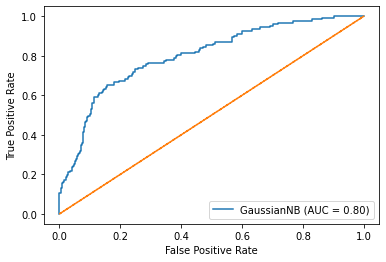

In [606]:
plot_roc_curve(model,X_train,y_train)
plt.plot(y_test,y_test,linestyle='--')

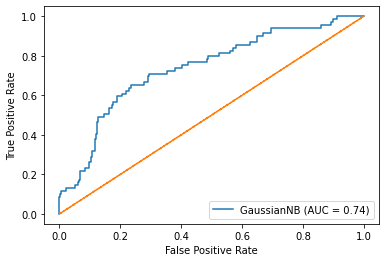

In [607]:
plot_roc_curve(model,X_test,y_test)
plt.plot(y_test,y_test,linestyle='--')

In [615]:
# Saving the bes model:
import joblib

joblib.dump(best_model,'HR.pkl')

['HR.pkl']